### Introduction

In this Kaggle competition we are asked to predict the forest cover type (the predominant kind of tree cover) from cartographic variables. The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

### Data information

#### Data field                 Description

1. Elevation ------------------------  Elevation in meters
    
2. slope      ------------------------  Slope in degrees

3. Aspect.     ------------------------ Aspect in degrees azimuth

4. horz_hydro ------------------------- Horz Dist to nearest surface water features

5. vert_hydro ------------------------- Vert Dist to nearest surface water features

6. horz_road  ------------------------- Horz Dist to nearest roadway

7. hillshade_9am ---------------------- Hillshade index at 9am, summer solstice (0 to 255 index)

8. hillshade_noon ---------------------Hillshade index at noon, summer solstice (0 to 255 index)

9. hillshade_3pm ---------------------- Hillshade index at 3pm, summer solstice (0 to 255 index)

10. horz_fire    ----------------------Horz Dist to nearest wildfire ignition points

11. Wilderness area designation (4 binary columns)

12. Soil Type designation (40 binary columns)

#### Hillshade
Hillshading is a technique used to create a realistic view of terrain by creating a three-dimensional surface from a two-dimensional display of it. Hillshading creates a hypothetical illumination of a surface by setting a position for a light source and calculating an illumination value for each cell based on the cell's relative orientation to the light, or based on the slope and aspect of the cell.

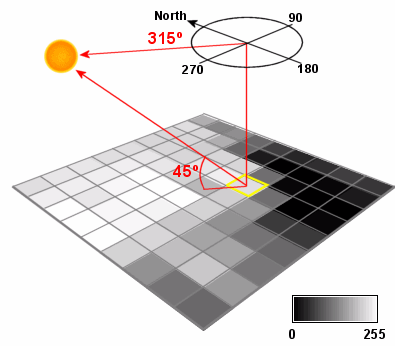

In [1]:
from IPython.display import Image
Image("/Users/tuktuk/Downloads/image001.gif")

### Target Label (Forest Cover Type)
1. Spruce/Fir.

2.  Lodgepole Pine.

3.  Ponderosa Pine.

4.  Cottonwood/Willow.

5.  Aspen.

6.  Douglas-fir.

7.  Krummholz

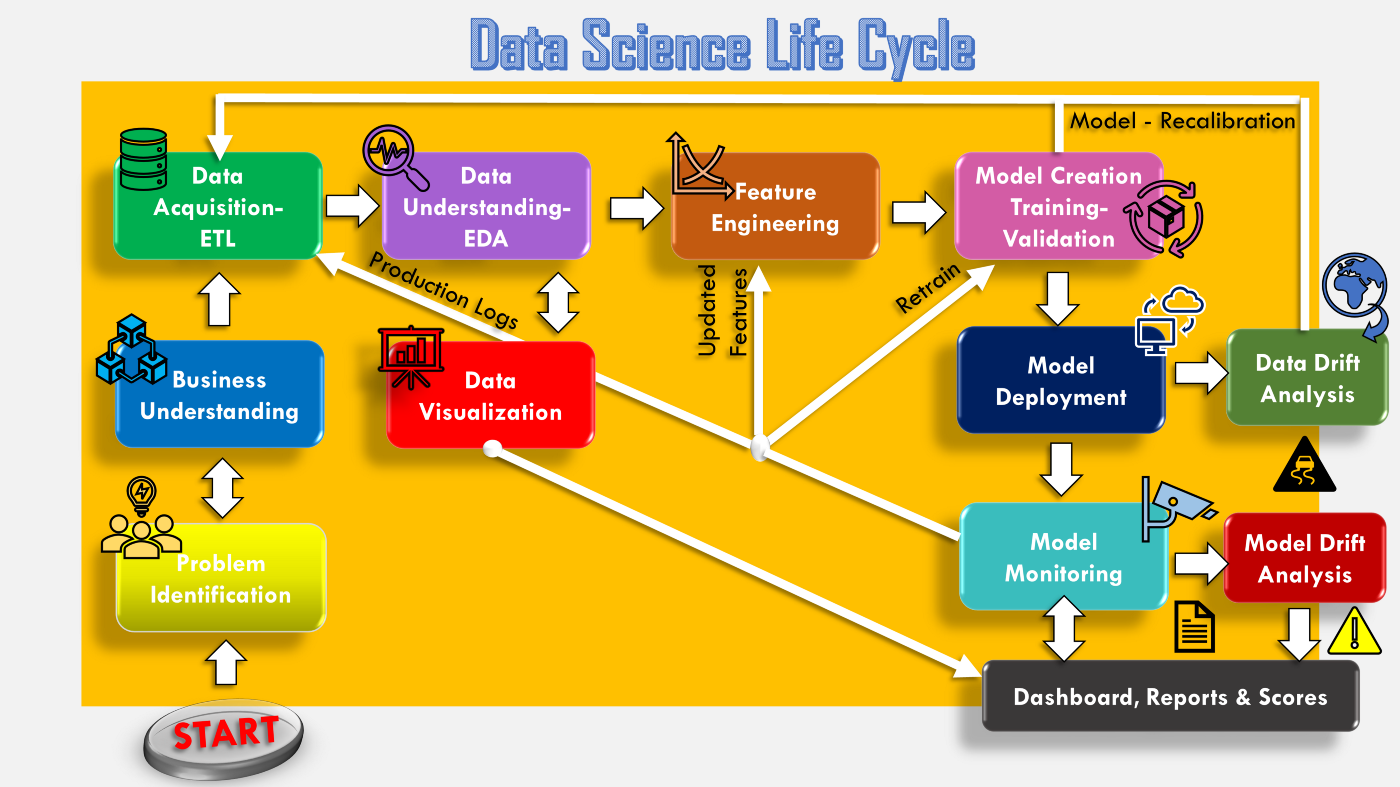

In [2]:
from IPython.display import Image
Image("/Users/tuktuk/Downloads/1*DjIccrMeRWmrC_mCUOGDhw.png")

### A Data Science Framework

Define the Problem:
    
Gather the Data:
    
Prepare Data for Consumption:
    
Perform Exploratory Analysis:
    
Model Data:
    
Validate and Implement Data Model:
    
Optimize and Strategize:

### Understanding

Researchers at the Department of Forest Sciences at Colorado State University collected over half a million measurements from tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30-meter x 30-meter sections of forest.

The resulting dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography. In total there are 55 columns/features.Dataset contains 581k entries with 54 attributes each. However, there are only 12 real features because two of them (Wilderness Area and Soil Type) are represented as a vector opposed to number notation(Like  after one hot encoding).

Problem

Can we build a model that predicts what types of trees grow in an area based on the surrounding characteristics? Like elevation, slope, distance, soil type etcetera.

Let’s think about what could define cover type. 
One is defintely Soil Type. 
Second is proximity to water body and fire ignition points.
Elevation also decides growth of some tress. 
Sunlight also decides growth of the tress.
Slope also plays a role for type of tress.
Proximity to the roadways (effect of pllution and human intervention?)


#### Cartography or mapmaking is the study and practice of making maps. Map making involves the application of both scientific and artistic elements, combining graphic talents and specialised knowledge of compilation and design principles with available techniques for product generation. Maps function as visualization tools for spatial data. Spatial data is stored in a database and extracted for a variety of purposes. The traditional analog methods of map making have been replaced by digital systems capable of producing dynamic interactive maps that can be manipulated digitally.

### Step 1: Define the Problem
For this project, the problem statement is given to us on a golden plater, build a model that predicts what types of trees grow in an area based on the surrounding characteristics? Like elevation, slope, distance, soil type etcetera.

### Step 2 : Gather the Data
Data is downloaded from Kaggle. It consists of train, test and submission datasets in csv formats.

""" https://www.kaggle.com/c/forest-cover-type-kernels-only/data"""

### Step 3: Prepare Data for Consumption
Since step 2 was provided to us , Therefore, normal processes in data wrangling, such as data architecture, governance, and extraction are out of scope. Thus, only data cleaning is in scope.

### 3.1 Import Libraries

### 3.11 Load Data Modelling Libraries
We will use the popular scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

In [3]:
# NumPy
import numpy as np

# Dataframe operations
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing functions
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Feature Selection
from sklearn import feature_selection
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import RFECV

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# splitting in train and test
from sklearn.model_selection import train_test_split

#sklearn and other model libraries
import sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

# Models
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier,VotingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB,  BernoulliNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression


# Cross-validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import cross_validate

# For pipeline
from sklearn.pipeline import Pipeline

# Checking Accuracy
from sklearn import metrics #accuracy measure
from sklearn.metrics import  precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, r2_score, mean_squared_error

# model selection and Optimising models
from sklearn import model_selection
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# GridSearchCV
from sklearn.model_selection import GridSearchCV

#Common Model Helpers

from sklearn import metrics
import random
import time

/Users/tuktuk/opt/anaconda3/lib/python3.8/site-packages/lightgbm/__init__.py:42: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  warnings.warn("Starting from version 2.2.1, the library file in distribution wheels for macOS "


### 3.2 Meet and Greet Data

In [4]:
train = pd.read_csv(r"/Users/tuktuk/Downloads/forest-cover-type-kernels-only/train.csv.zip") 

test = pd.read_csv(r"/Users/tuktuk/Downloads/forest-cover-type-kernels-only/test.csv.zip") 

In [5]:
data = [train, test] # for operations on both datsets

### EDA

In [6]:
print(train.shape, test.shape)

(15120, 56) (565892, 55)


In [7]:
# test data is almost 4 times of train data

In [8]:
train.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1  

In [9]:
test.sample(5)

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
353065  368186       3029     347     22                               750   
175420  190541       3259     332     17                               277   
443664  458785       3126     164      7                                 0   
535127  550248       2984     201     31                               421   
449277  464398       2962      52     24                               391   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
353065                             160                             2489   
175420                              69                             5230   
443664                               0                             1365   
535127                              47                             3584   
449277                             146                              537   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
353065            173             199            161   
175420            180             217            176   
443664            227             242            149   
535127            190             249            174   
449277            224             181             78   

        Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
353065                                1891                 0   
175420                                1567                 1   
443664                                2147                 1   
535127                                1256                 0   
449277                                 743                 0   

        Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  \
353065                 0                 1                 0           0   
175420                 0                 0                 0           0   
443664                 0                 0                 0           0   
535127                 0                 1                 0           0   
449277                 0                 1                 0           0   

        Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  \
353065           0           0           0           0           0   
175420           0           0           0           0           0   
443664           0           0           0           0           0   
535127           0           0           0           0           0   
449277           0           0           0           0           0   

        Soil_Type7  Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  \
353065           0           0           0            0            0   
175420           0           0           0            0            0   
443664           0           0           0            0            0   
535127           0           0           0            0            0   
449277           0           0           0            0            0   

        Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  \
353065            0            0            0            0            0   
175420            0            0            0            0            0   
443664            0            0            0            0            0   
535127            0            1            0            0            0   
449277            0            0            0            0            0   

        Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  \
353065            0            0            0            0            0   
175420            0            0            0            0            0   
443664            0            0            0            0            0   
535127            0            0            0            0            0   
449277            0            0            0            0            0   

        Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  \
353065            0            0            1            0            0   
175420 

### Data info

The dataset has 55 columns in total where Wilderness_Area consists of 4 dummy variables and Soil_Tpye consists of 40 dummy variables.

Continuous Data

Elevation (in meters),
Aspect (in degrees azimuth1),
Slope (in degrees),
Horizontal_Distance_To_Hydrology (Horizontal distance to nearest surface water features in meters),
Horizontal_Distance_To_Roadways (Horizontal distance to nearest roadway in meters),
Horizontal_Distance_To_Fire_Points (Horizontal distance to nearest wildfire ignition points in meters),
Vertical_Distance_To_Hydrology (Vertical distance to nearest surface water features in meters),
Hillshade_9am (Hill shade index at 9am, summer solstice. Value out of 255),
Hillshade_Noon (Hill shade index at noon, summer solstice. Value out of 255),
Hillshade_3pm (Hill shade index at 3pm, summer solstice. Value out of 255),

Categorical Data

Wilderness Area (4 dummy variable binary columns, 0 = absence or 1 = presence)

Soil Type (40 dummy variable binary columns, 0 = absence or 1 = presence)

The target variable Cover_Type is defined as an integer value between 1 and 7, with the following key:


1. Spruce/Fir.

2. Lodgepole Pine.

3. Ponderosa Pine.

4. Cottonwood/Willow

5. Aspen

6. Douglas-fir

7. Krummholz


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Id                                  565892 non-null  int64
 1   Elevation                           565892 non-null  int64
 2   Aspect                              565892 non-null  int64
 3   Slope                               565892 non-null  int64
 4   Horizontal_Distance_To_Hydrology    565892 non-null  int64
 5   Vertical_Distance_To_Hydrology      565892 non-null  int64
 6   Horizontal_Distance_To_Roadways     565892 non-null  int64
 7   Hillshade_9am                       565892 non-null  int64
 8   Hillshade_Noon                      565892 non-null  int64
 9   Hillshade_3pm                       565892 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  565892 non-null  int64
 11  Wilderness_Area1                    565892 non-null 

#### There are 54 indpenedent variables (leaving Id aside) and 1 dependent variable ("Cover_Type")
#### All columns are of int64 type and there are no missing values, both in train and test data

In [12]:
train.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   15120.000000                        15120.000000      15120.000000   
mean      135.091997                         1511.147288          0.237897   
std        45.895189                         1099.936493          0.425810   
min         0.000000                            0.000000          0.000000   
25%       106.000000                          730.000000          0.000000   
50%       138.000000                         1256.000000          0.000000   
75%       167.000000                         1988.250000          0.000000   
max       248.000000                         6993.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4    Soil_Type1  \
count      15120.000000      15120.000000      15120.000000  15120.000000   
mean           0.033003          0.419907          0.309193      0.023479   
std            0.178649          0.493560          0.462176      0.151424   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000      0.000000   
50%            0.000000          0.000000          0.000000      0.000000   
75%            0.000000          1.000000          1.000000      0.000000   
max            1.000000          1.000000          1.000000      1.000000   

         Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5    Soil_Type6  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.041204      0.063624      0.055754      0.010913      0.042989   
std        0.198768      0.244091      0.229454      0.103896      0.202840   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000 

#### We know that all features are numerical data types. Lets find nominal and ordinal data¶

In [13]:
#list of discrete variables

discrete_vars = [var for var in train.columns if len(train[var].unique())<20 and var not in ['Id', 'Cover_Type']]

print('Number of discrete variables: ', discrete_vars, len(discrete_vars))

Number of discrete variables:  ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'] 44


In [14]:
# list of continuous variables

cont_vars = [var for var in train.columns if var not in discrete_vars+['Id', 'Cover_Type']]

print('Number of continuous variables: ', cont_vars, len(cont_vars))

Number of continuous variables:  ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'] 10


#### So out of 56, 44 are discrete data types and 10 are continuous datatypes(Id & Cover_Type are excluded).

#### Lets find unique values for discrete type, and range for continuous type

In [15]:
for var in discrete_vars:
    print(var, train[var].unique())

Wilderness_Area1 [1 0]
Wilderness_Area2 [0 1]
Wilderness_Area3 [0 1]
Wilderness_Area4 [0 1]
Soil_Type1 [0 1]
Soil_Type2 [0 1]
Soil_Type3 [0 1]
Soil_Type4 [0 1]
Soil_Type5 [0 1]
Soil_Type6 [0 1]
Soil_Type7 [0]
Soil_Type8 [0 1]
Soil_Type9 [0 1]
Soil_Type10 [0 1]
Soil_Type11 [0 1]
Soil_Type12 [0 1]
Soil_Type13 [0 1]
Soil_Type14 [0 1]
Soil_Type15 [0]
Soil_Type16 [0 1]
Soil_Type17 [0 1]
Soil_Type18 [0 1]
Soil_Type19 [0 1]
Soil_Type20 [0 1]
Soil_Type21 [0 1]
Soil_Type22 [0 1]
Soil_Type23 [0 1]
Soil_Type24 [0 1]
Soil_Type25 [0 1]
Soil_Type26 [0 1]
Soil_Type27 [0 1]
Soil_Type28 [0 1]
Soil_Type29 [1 0]
Soil_Type30 [0 1]
Soil_Type31 [0 1]
Soil_Type32 [0 1]
Soil_Type33 [0 1]
Soil_Type34 [0 1]
Soil_Type35 [0 1]
Soil_Type36 [0 1]
Soil_Type37 [0 1]
Soil_Type38 [0 1]
Soil_Type39 [0 1]
Soil_Type40 [0 1]


In [16]:
for var in cont_vars:
    print(var, train[var].min(),'-',train[var].max())

Elevation 1863 - 3849
Aspect 0 - 360
Slope 0 - 52
Horizontal_Distance_To_Hydrology 0 - 1343
Vertical_Distance_To_Hydrology -146 - 554
Horizontal_Distance_To_Roadways 0 - 6890
Hillshade_9am 0 - 254
Hillshade_Noon 99 - 254
Hillshade_3pm 0 - 248
Horizontal_Distance_To_Fire_Points 0 - 6993


#### Checking null values

In [17]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [18]:
test.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


#### No missing values in both train and test data

### 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

In [19]:
cont_vars

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

#### Checking outliers with boxplot

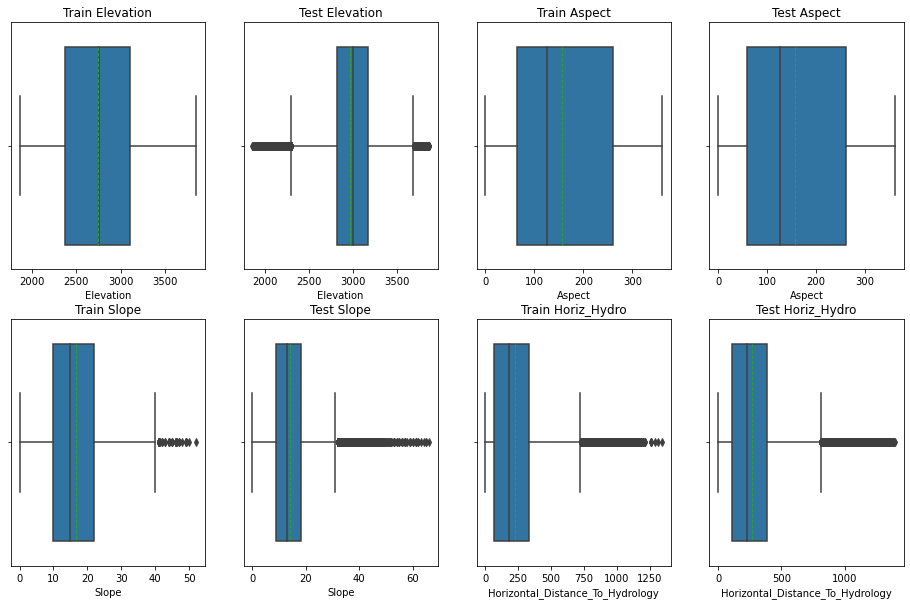

In [20]:
plt.figure(figsize=(16,10))
plt.subplot(241)
sns.boxplot(train['Elevation'],showmeans = True, meanline = True)
plt.title('Train Elevation')
plt.subplot(242)
sns.boxplot(test['Elevation'],showmeans = True, meanline = True)
plt.title('Test Elevation')
plt.subplot(243)
sns.boxplot(train['Aspect'],showmeans = True, meanline = True)
plt.title('Train Aspect')
plt.subplot(244)
sns.boxplot(test['Aspect'],showmeans = True, meanline = True)
plt.title('Test Aspect')

plt.subplot(245)
sns.boxplot(train['Slope'],showmeans = True, meanline = True)
plt.title('Train Slope')
plt.subplot(246)
sns.boxplot(test['Slope'],showmeans = True, meanline = True)
plt.title('Test Slope')
plt.subplot(247)
sns.boxplot(train['Horizontal_Distance_To_Hydrology'],showmeans = True, meanline = True)
plt.title('Train Horiz_Hydro')
plt.subplot(248)
sns.boxplot(test['Horizontal_Distance_To_Hydrology'],showmeans = True, meanline = True)
plt.title('Test Horiz_Hydro');

#### Elevation has lots of outliers in test data, rest Aspect, Slope & Horizental_Distance_To_Hydrology have same patterns of outliers

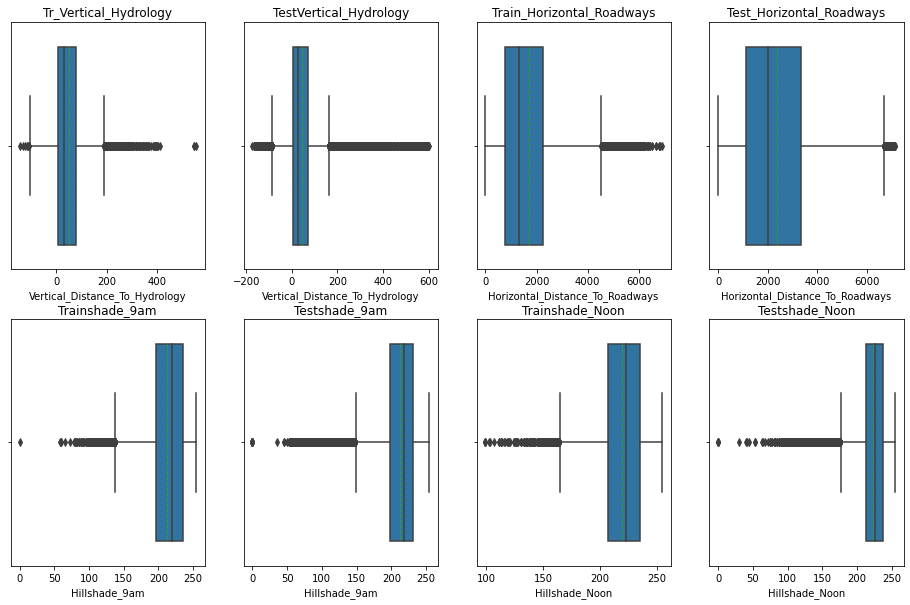

In [21]:
plt.figure(figsize=(16,10))
plt.subplot(241)
sns.boxplot(train['Vertical_Distance_To_Hydrology'],showmeans = True, meanline = True)
plt.title('Tr_Vertical_Hydrology')
plt.subplot(242)
sns.boxplot(test['Vertical_Distance_To_Hydrology'],showmeans = True, meanline = True)
plt.title('TestVertical_Hydrology')
plt.subplot(243)
sns.boxplot(train['Horizontal_Distance_To_Roadways'],showmeans = True, meanline = True)
plt.title('Train_Horizontal_Roadways')
plt.subplot(244)
sns.boxplot(test['Horizontal_Distance_To_Roadways'],showmeans = True, meanline = True)
plt.title('Test_Horizontal_Roadways')

plt.subplot(245)
sns.boxplot(train['Hillshade_9am'],showmeans = True, meanline = True)
plt.title('Trainshade_9am')
plt.subplot(246)
sns.boxplot(test['Hillshade_9am'],showmeans = True, meanline = True)
plt.title('Testshade_9am')
plt.subplot(247)
sns.boxplot(train['Hillshade_Noon'],showmeans = True, meanline = True)
plt.title('Trainshade_Noon')
plt.subplot(248)
sns.boxplot(test['Hillshade_Noon'],showmeans = True, meanline = True);
plt.title('Testshade_Noon');

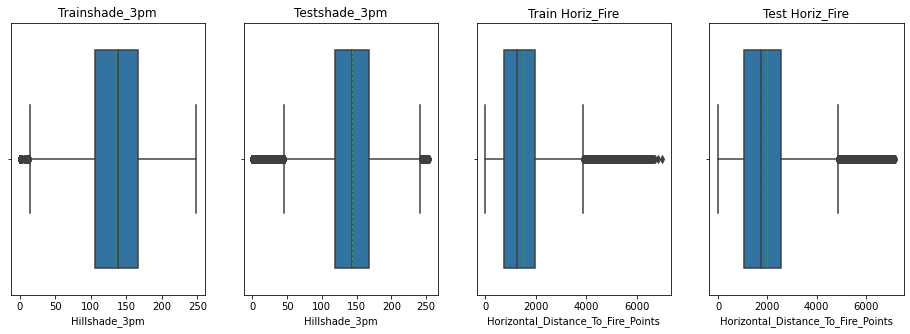

In [22]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(train['Hillshade_3pm'],showmeans = True, meanline = True)
plt.title('Trainshade_3pm')
plt.subplot(142)
sns.boxplot(test['Hillshade_3pm'],showmeans = True, meanline = True)
plt.title('Testshade_3pm')
plt.subplot(143)
sns.boxplot(train['Horizontal_Distance_To_Fire_Points'],showmeans = True, meanline = True)
plt.title('Train Horiz_Fire')
plt.subplot(144)
sns.boxplot(test['Horizontal_Distance_To_Fire_Points'],showmeans = True, meanline = True)
plt.title('Test Horiz_Fire');

#### checking outliers with defined function

In [23]:
list1 = train['Elevation'].tolist()
list1
array1 = np.array(list1)
array1
first = np.percentile(array1, 25)
first

2376.0

In [24]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [25]:
# loop through all columns to see if there are any outliers
for dataset in data:
    for column in cont_vars:
        if outlier_function(dataset, column)[2] > 0:
            print("There are {} outliers in {}".format(outlier_function(dataset, column)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 249 outliers in Slope
There are 280 outliers in Horizontal_Distance_To_Hydrology
There are 5205 outliers in Vertical_Distance_To_Hydrology
There are 995 outliers in Hillshade_9am
There are 1126 outliers in Hillshade_Noon
There are 5 outliers in Horizontal_Distance_To_Fire_Points


#### We will take closer look to below 4 columns:

Horizontal_Distance_To_Hydrology

Vertical_Distance_To_Hydrology

Horizontal_Distance_To_Roadways

Horizontal_Distance_To_Fire_Points 

Recall the data ranges of those 4 columns:

Horizontal_Distance_To_Hydrology: 0, 1343
    
Vertical_Distance_To_Hydrology: -146, 554
    
Horizontal_Distance_To_Roadways: 0, 6890
    
Horizaontal_Distance_To_Firepoints: 0, 6993 
    
Horizaontal_Distance_To_Firepoints having the highest number of outliers and widest data range.




#### 3.22.1 Correcting - Elevation in train does not have outliers, but it has lots of outliers in test data
#### Considering the Horizaontal_Distance_To_Firepoints having the highest number of outliers and widest data range, I am going to remove outliers only from that column.
##### Rest , all have similar types of outliers

In [26]:
# Removing Horizontal_Distance_To_Fire_Points outliers 
trees = train[(train['Horizontal_Distance_To_Fire_Points'] > outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (train['Horizontal_Distance_To_Fire_Points'] < outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[1])]
trees.shape

(14988, 56)

In [27]:
train.shape

(15120, 56)

#### I have removed 132outliers in fire point 

### 3.22.2 Completing - As there are no missing values, imputation not required

### lets see brief insight in to relation between various features and dependent variable ("Cover_Type")

### Data Visualisation

In [28]:
train['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [29]:
print(train['Cover_Type'].value_counts())

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64


In [30]:
# Training set is chosen in such a  fashion that each class has the same number of observations.

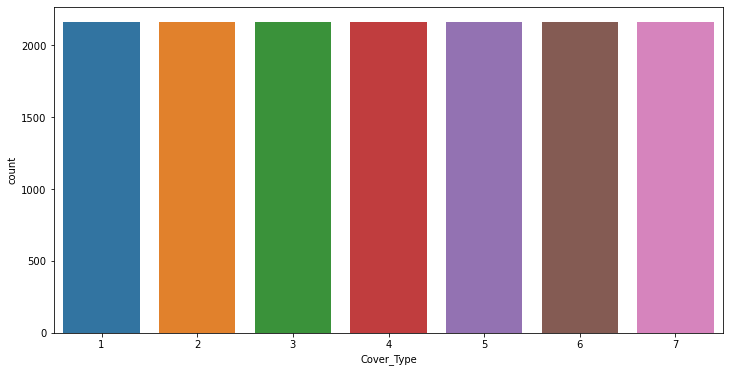

In [31]:
# Target Label Visualisation
plt.figure(figsize = (12,6))

sns.countplot(x= 'Cover_Type', data= train)

#### We can see that train data has same numbers of each forest cover type

In [32]:
print(train['Cover_Type'].value_counts())

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64


#### we can see that outliers have affected Cover Type 1,2 and 5.

In [33]:
# Visualisation of continuous features
cont_vars

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

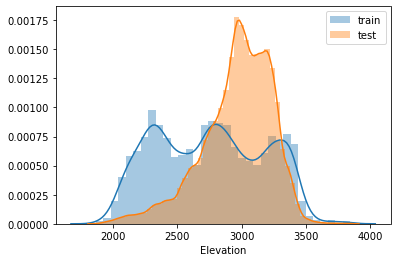

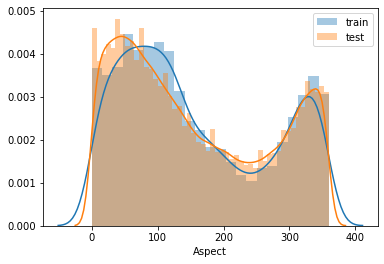

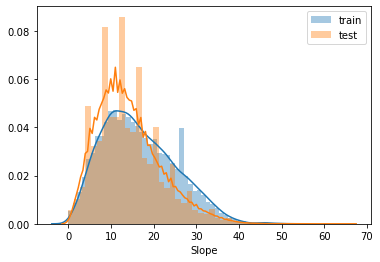

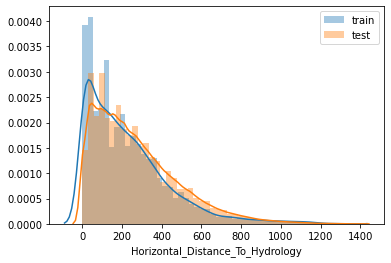

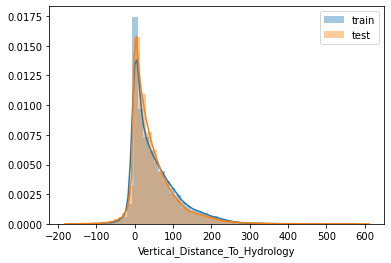

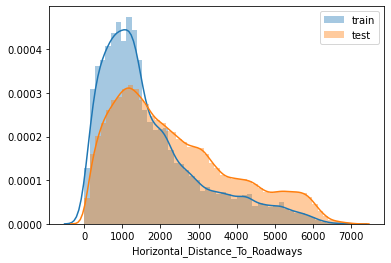

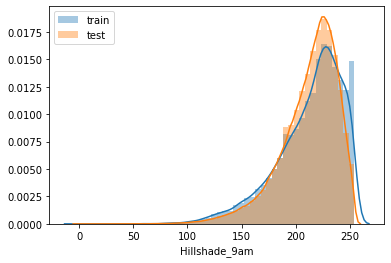

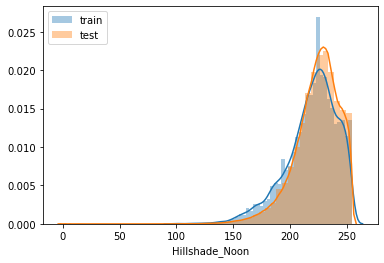

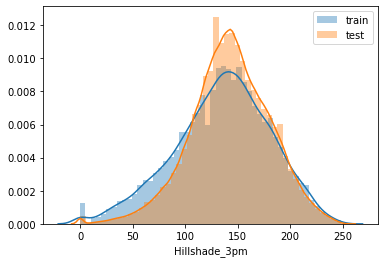

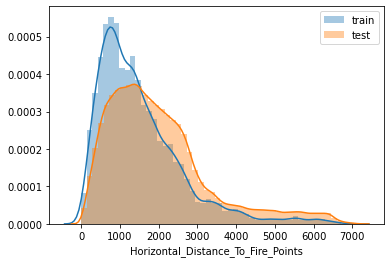

In [34]:
numerical_features = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
                      'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am',
                      'Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
for feature_name in numerical_features:
    plt.figure()
    sns.distplot(train[feature_name], label='train')
    sns.distplot(test[feature_name], label='test')
    plt.legend()
    plt.show()

##### Except Elevation, all have similar distribution in train and test data
#### 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Horizontal_Distance_To_Fire_Points' are right/left skewed , will need normalisation

#### While most of the features are normally distributed across some mean, like Slope or Hillshade, the Aspect is a little bit different. The reason for such strange distribution is in physical meaning of this feature, since As- pect is measured in angles, either positive or negative angle from 0 must yield the same(almost) label for this path.

In [35]:
# Lets see their relation with the target label

Density Plot of Elevation for Forest cover types


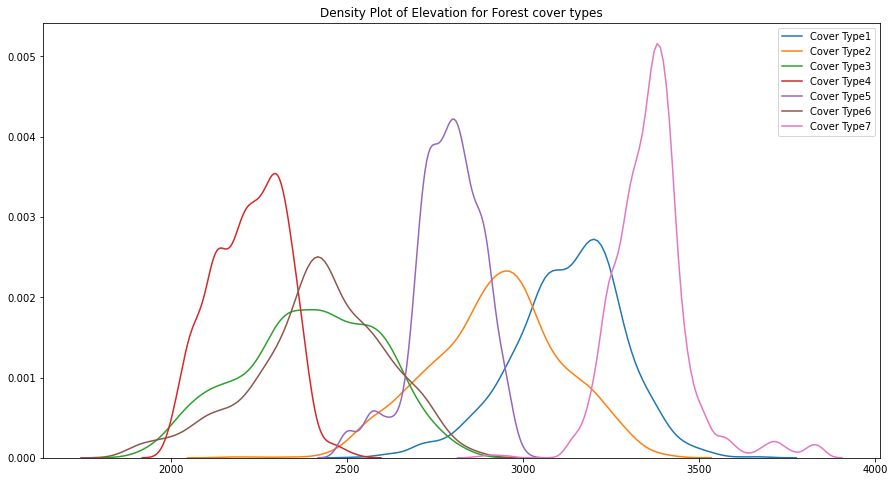

In [36]:
print("Density Plot of Elevation for Forest cover types")
plt.figure(figsize=(15,8))

sns.kdeplot(train["Elevation"][train.Cover_Type == 1])
sns.kdeplot(train["Elevation"][train.Cover_Type == 2])
sns.kdeplot(train["Elevation"][train.Cover_Type == 3])
sns.kdeplot(train["Elevation"][train.Cover_Type == 4])
sns.kdeplot(train["Elevation"][train.Cover_Type == 5])
sns.kdeplot(train["Elevation"][train.Cover_Type == 6])
sns.kdeplot(train["Elevation"][train.Cover_Type == 7])
plt.legend(['Cover Type1', 'Cover Type2', 'Cover Type3', 'Cover Type4','Cover Type5',
           'Cover Type6','Cover Type7'])
plt.title('Density Plot of Elevation for Forest cover types')
plt.show();

In [37]:
# It can be seen that elevation is related to the cover type
# Lets see for 'Aspect and 'Slope'

Density Plot of Aspect for Forest cover types


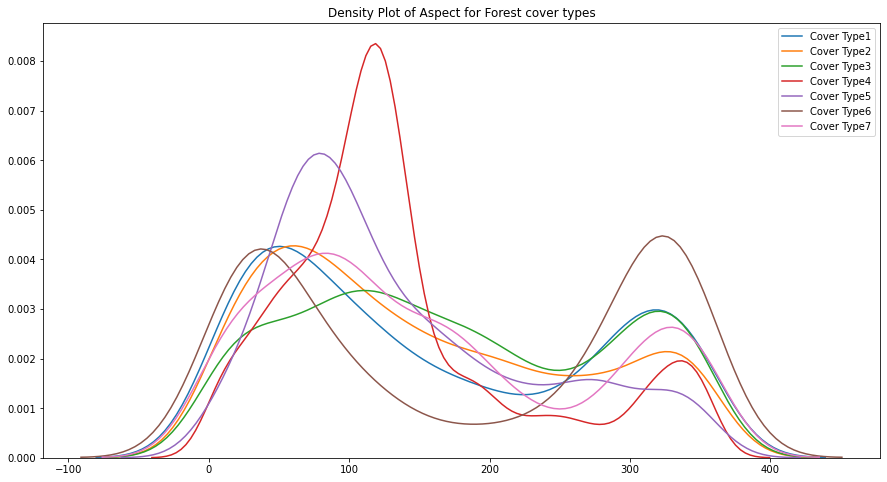

In [38]:
print("Density Plot of Aspect for Forest cover types")
plt.figure(figsize=(15,8))

sns.kdeplot(train["Aspect"][train.Cover_Type == 1])
sns.kdeplot(train["Aspect"][train.Cover_Type == 2])
sns.kdeplot(train["Aspect"][train.Cover_Type == 3])
sns.kdeplot(train["Aspect"][train.Cover_Type == 4])
sns.kdeplot(train["Aspect"][train.Cover_Type == 5])
sns.kdeplot(train["Aspect"][train.Cover_Type == 6])
sns.kdeplot(train["Aspect"][train.Cover_Type == 7])
plt.legend(['Cover Type1', 'Cover Type2', 'Cover Type3', 'Cover Type4','Cover Type5',
           'Cover Type6','Cover Type7'])
plt.title('Density Plot of Aspect for Forest cover types')
plt.show();

In [39]:
# It can be seen that distribution of 4 types is similar
# Lets check for slope

Density Plot of Slope for Forest cover types


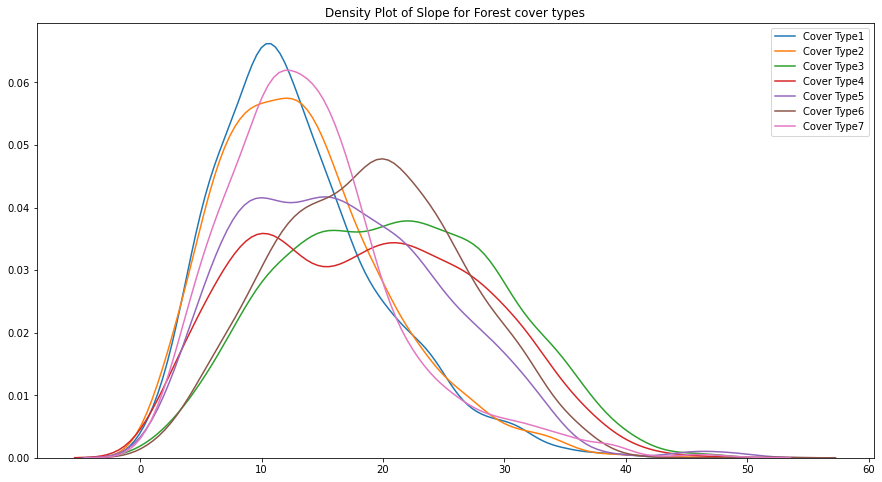

In [40]:
print("Density Plot of Slope for Forest cover types")
plt.figure(figsize=(15,8))

sns.kdeplot(train["Slope"][train.Cover_Type == 1])
sns.kdeplot(train["Slope"][train.Cover_Type == 2])
sns.kdeplot(train["Slope"][train.Cover_Type == 3])
sns.kdeplot(train["Slope"][train.Cover_Type == 4])
sns.kdeplot(train["Slope"][train.Cover_Type == 5])
sns.kdeplot(train["Slope"][train.Cover_Type == 6])
sns.kdeplot(train["Slope"][train.Cover_Type == 7])
plt.legend(['Cover Type1', 'Cover Type2', 'Cover Type3', 'Cover Type4','Cover Type5',
           'Cover Type6','Cover Type7'])
plt.title('Density Plot of Slope for Forest cover types')
plt.show();

In [41]:
# clearly 2 sets of forest types are seen
# Lets check for 'Horizontal_Distance_To_Hydrology'

Density Plot of 'Horizontal_Distance_To_Hydrology' for Forest cover types


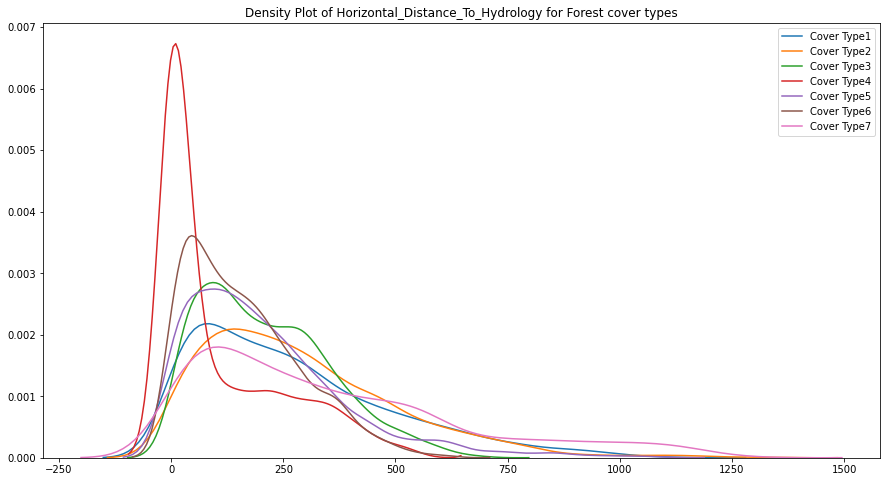

In [42]:
print("Density Plot of 'Horizontal_Distance_To_Hydrology' for Forest cover types")
plt.figure(figsize=(15,8))

sns.kdeplot(train["Horizontal_Distance_To_Hydrology"][train.Cover_Type == 1])
sns.kdeplot(train["Horizontal_Distance_To_Hydrology"][train.Cover_Type == 2])
sns.kdeplot(train["Horizontal_Distance_To_Hydrology"][train.Cover_Type == 3])
sns.kdeplot(train["Horizontal_Distance_To_Hydrology"][train.Cover_Type == 4])
sns.kdeplot(train["Horizontal_Distance_To_Hydrology"][train.Cover_Type == 5])
sns.kdeplot(train["Horizontal_Distance_To_Hydrology"][train.Cover_Type == 6])
sns.kdeplot(train["Horizontal_Distance_To_Hydrology"][train.Cover_Type == 7])
plt.legend(['Cover Type1', 'Cover Type2', 'Cover Type3', 'Cover Type4','Cover Type5',
           'Cover Type6','Cover Type7'])
plt.title('Density Plot of Horizontal_Distance_To_Hydrology for Forest cover types')
plt.show();

In [43]:
# Except for Type 4, distribution is similar
# Lets check for 'Vertical_Distance_To_Hydrology'

Density Plot of Vertical_Distance_To_Hydrology for Forest cover types


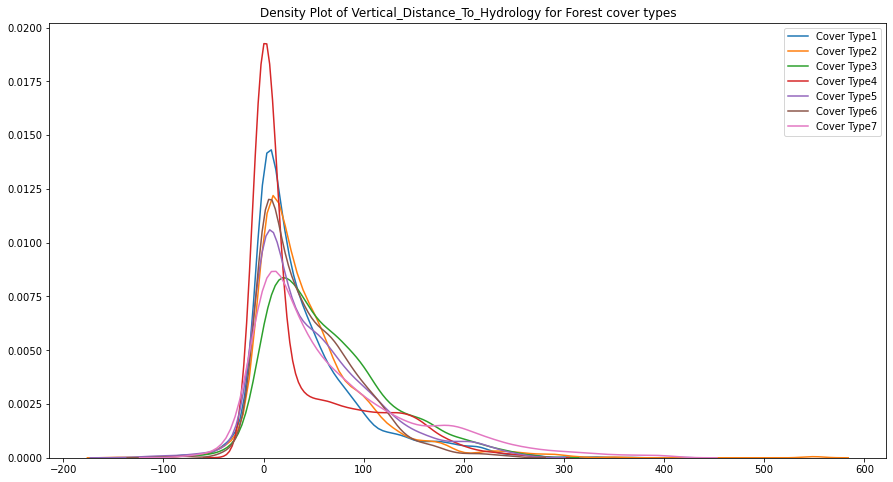

In [44]:
print("Density Plot of Vertical_Distance_To_Hydrology for Forest cover types")
plt.figure(figsize=(15,8))

sns.kdeplot(train["Vertical_Distance_To_Hydrology"][train.Cover_Type == 1])
sns.kdeplot(train["Vertical_Distance_To_Hydrology"][train.Cover_Type == 2])
sns.kdeplot(train["Vertical_Distance_To_Hydrology"][train.Cover_Type == 3])
sns.kdeplot(train["Vertical_Distance_To_Hydrology"][train.Cover_Type == 4])
sns.kdeplot(train["Vertical_Distance_To_Hydrology"][train.Cover_Type == 5])
sns.kdeplot(train["Vertical_Distance_To_Hydrology"][train.Cover_Type == 6])
sns.kdeplot(train["Vertical_Distance_To_Hydrology"][train.Cover_Type == 7])
plt.legend(['Cover Type1', 'Cover Type2', 'Cover Type3', 'Cover Type4','Cover Type5',
           'Cover Type6','Cover Type7'])
plt.title('Density Plot of Vertical_Distance_To_Hydrology for Forest cover types')
plt.show();

In [45]:
# Vertical_Distance_To_Hydrology for all types has similar distribution with different peaks
# Lets check for 'Horizontal_Distance_To_Roadways'

Density Plot of Horizontal_Distance_To_Roadways for Forest cover types


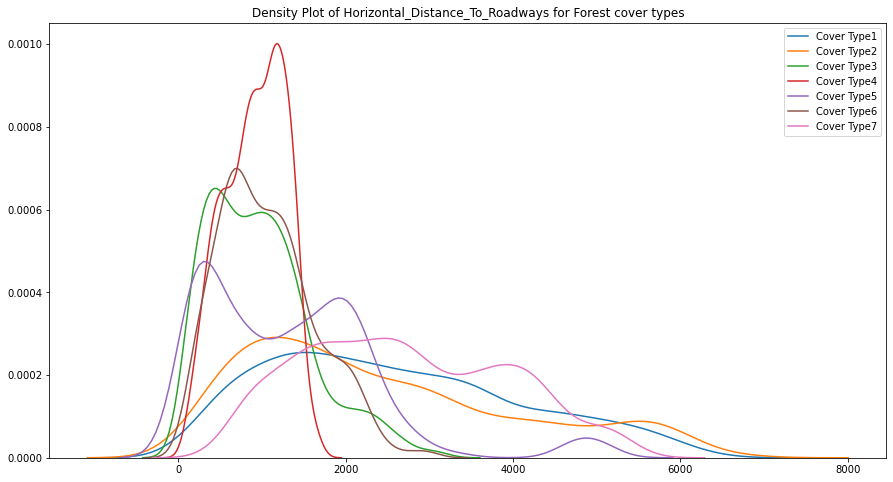

In [46]:
print("Density Plot of Horizontal_Distance_To_Roadways for Forest cover types")
plt.figure(figsize=(15,8))

sns.kdeplot(train["Horizontal_Distance_To_Roadways"][train.Cover_Type == 1])
sns.kdeplot(train["Horizontal_Distance_To_Roadways"][train.Cover_Type == 2])
sns.kdeplot(train["Horizontal_Distance_To_Roadways"][train.Cover_Type == 3])
sns.kdeplot(train["Horizontal_Distance_To_Roadways"][train.Cover_Type == 4])
sns.kdeplot(train["Horizontal_Distance_To_Roadways"][train.Cover_Type == 5])
sns.kdeplot(train["Horizontal_Distance_To_Roadways"][train.Cover_Type == 6])
sns.kdeplot(train["Horizontal_Distance_To_Roadways"][train.Cover_Type == 7])
plt.legend(['Cover Type1', 'Cover Type2', 'Cover Type3', 'Cover Type4','Cover Type5',
           'Cover Type6','Cover Type7'])
plt.title('Density Plot of Horizontal_Distance_To_Roadways for Forest cover types')
plt.show();

In [47]:
# distribution shows that Horizontal_Distance_To_Roadways is related to the forest cover types
# Lets check for 'Hillshade_9am'

Density Plot of Hillshade_9am for Forest cover types


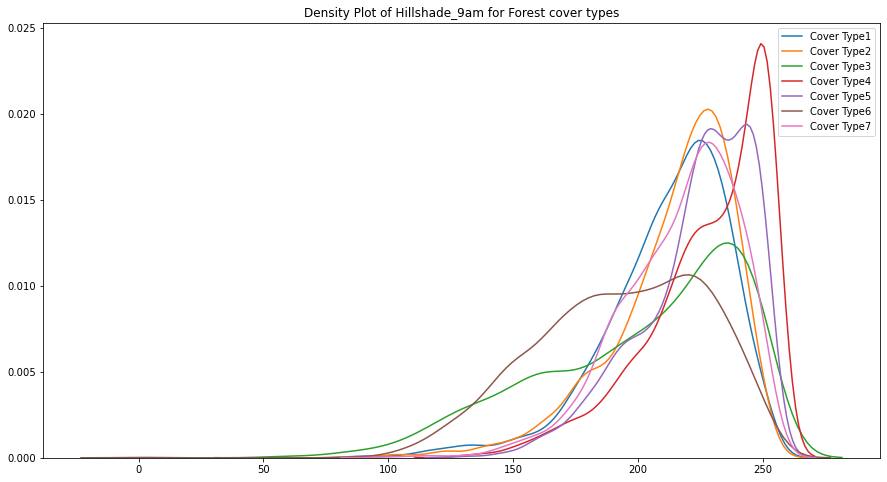

In [48]:
print("Density Plot of Hillshade_9am for Forest cover types")
plt.figure(figsize=(15,8))

sns.kdeplot(train["Hillshade_9am"][train.Cover_Type == 1])
sns.kdeplot(train["Hillshade_9am"][train.Cover_Type == 2])
sns.kdeplot(train["Hillshade_9am"][train.Cover_Type == 3])
sns.kdeplot(train["Hillshade_9am"][train.Cover_Type == 4])
sns.kdeplot(train["Hillshade_9am"][train.Cover_Type == 5])
sns.kdeplot(train["Hillshade_9am"][train.Cover_Type == 6])
sns.kdeplot(train["Hillshade_9am"][train.Cover_Type == 7])
plt.legend(['Cover Type1', 'Cover Type2', 'Cover Type3', 'Cover Type4','Cover Type5',
           'Cover Type6','Cover Type7'])
plt.title('Density Plot of Hillshade_9am for Forest cover types')
plt.show();

In [49]:
# Except for Type 6, distribution is similar
# Lets check for Hillshade_Noon

Density Plot of Hillshade_Noon for Forest cover types


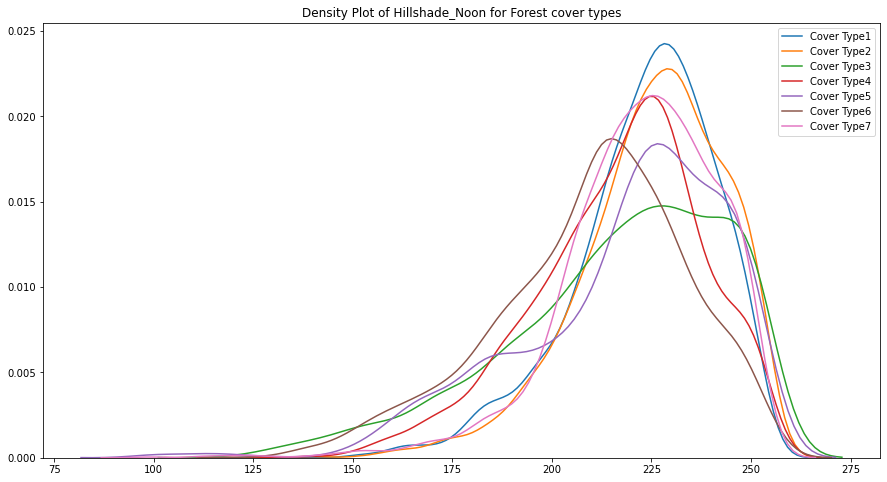

In [50]:
print("Density Plot of Hillshade_Noon for Forest cover types")
plt.figure(figsize=(15,8))

sns.kdeplot(train["Hillshade_Noon"][train.Cover_Type == 1])
sns.kdeplot(train["Hillshade_Noon"][train.Cover_Type == 2])
sns.kdeplot(train["Hillshade_Noon"][train.Cover_Type == 3])
sns.kdeplot(train["Hillshade_Noon"][train.Cover_Type == 4])
sns.kdeplot(train["Hillshade_Noon"][train.Cover_Type == 5])
sns.kdeplot(train["Hillshade_Noon"][train.Cover_Type == 6])
sns.kdeplot(train["Hillshade_Noon"][train.Cover_Type == 7])
plt.legend(['Cover Type1', 'Cover Type2', 'Cover Type3', 'Cover Type4','Cover Type5',
           'Cover Type6','Cover Type7'])
plt.title('Density Plot of Hillshade_Noon for Forest cover types')
plt.show();

In [51]:
# Distribution looks similar, so no major factor
# Lets check for Hillshade_3pm

Density Plot of Hillshade_3pm for Forest cover types


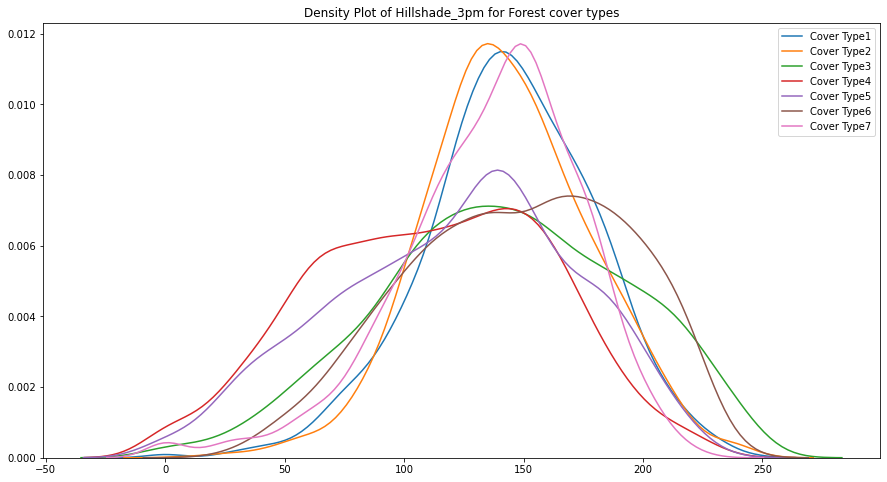

In [52]:
print("Density Plot of Hillshade_3pm for Forest cover types")
plt.figure(figsize=(15,8))

sns.kdeplot(train["Hillshade_3pm"][train.Cover_Type == 1])
sns.kdeplot(train["Hillshade_3pm"][train.Cover_Type == 2])
sns.kdeplot(train["Hillshade_3pm"][train.Cover_Type == 3])
sns.kdeplot(train["Hillshade_3pm"][train.Cover_Type == 4])
sns.kdeplot(train["Hillshade_3pm"][train.Cover_Type == 5])
sns.kdeplot(train["Hillshade_3pm"][train.Cover_Type == 6])
sns.kdeplot(train["Hillshade_3pm"][train.Cover_Type == 7])
plt.legend(['Cover Type1', 'Cover Type2', 'Cover Type3', 'Cover Type4','Cover Type5',
           'Cover Type6','Cover Type7'])
plt.title('Density Plot of Hillshade_3pm for Forest cover types')
plt.show();

In [53]:
# Except for type 4 and type 6, distribution is similar
# Lets check for 'Horizontal_Distance_To_Fire_Points'

Density Plot of Horizontal_Distance_To_Fire_Points for Forest cover types


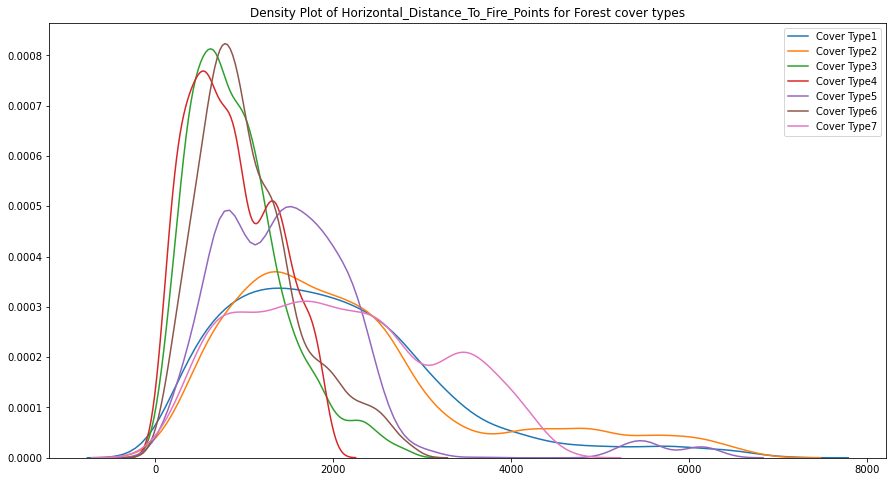

In [54]:
print("Density Plot of Horizontal_Distance_To_Fire_Points for Forest cover types")
plt.figure(figsize=(15,8))

sns.kdeplot(train["Horizontal_Distance_To_Fire_Points"][train.Cover_Type == 1])
sns.kdeplot(train["Horizontal_Distance_To_Fire_Points"][train.Cover_Type == 2])
sns.kdeplot(train["Horizontal_Distance_To_Fire_Points"][train.Cover_Type == 3])
sns.kdeplot(train["Horizontal_Distance_To_Fire_Points"][train.Cover_Type == 4])
sns.kdeplot(train["Horizontal_Distance_To_Fire_Points"][train.Cover_Type == 5])
sns.kdeplot(train["Horizontal_Distance_To_Fire_Points"][train.Cover_Type == 6])
sns.kdeplot(train["Horizontal_Distance_To_Fire_Points"][train.Cover_Type == 7])
plt.legend(['Cover Type1', 'Cover Type2', 'Cover Type3', 'Cover Type4','Cover Type5',
           'Cover Type6','Cover Type7'])
plt.title('Density Plot of Horizontal_Distance_To_Fire_Points for Forest cover types')
plt.show();

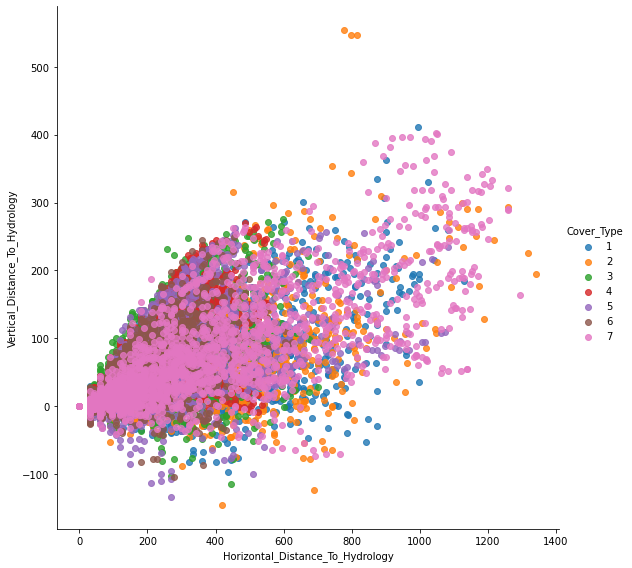

In [55]:
sns.lmplot(x= "Horizontal_Distance_To_Hydrology", y= "Vertical_Distance_To_Hydrology" , hue = 'Cover_Type',
           data= train, fit_reg = False, height = 8);
plt.show()

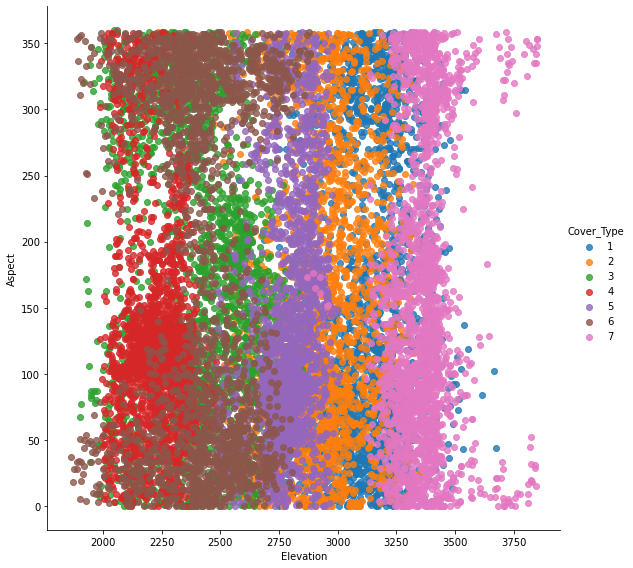

In [56]:
sns.lmplot(x= 'Elevation', y= 'Aspect' , hue = 'Cover_Type', data= train, fit_reg = False, height = 8);
plt.show()

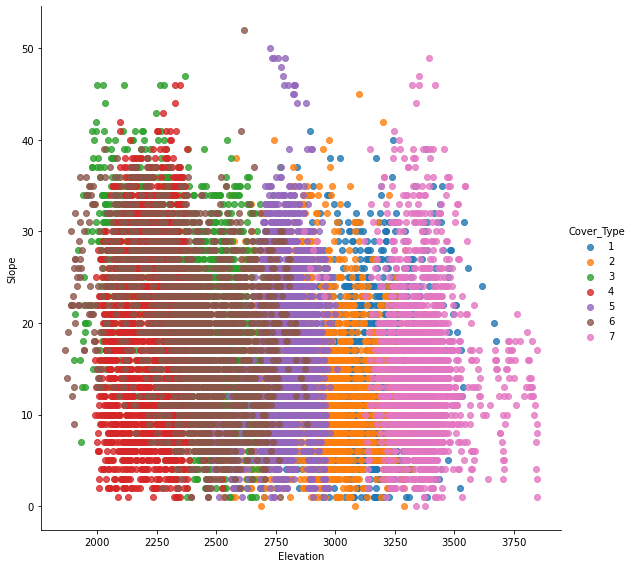

In [57]:
sns.lmplot(x= 'Elevation', y= 'Slope' , hue = 'Cover_Type', data= train, fit_reg = False, height = 8);
plt.show()

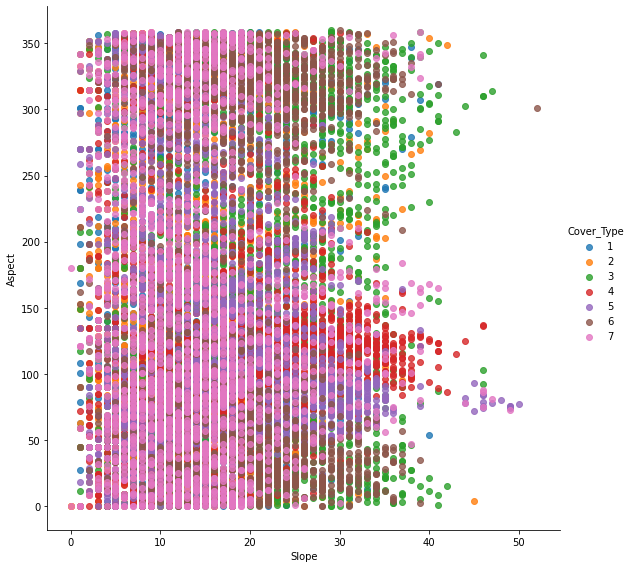

In [58]:
sns.lmplot(x= 'Slope', y= 'Aspect' , hue = 'Cover_Type', data= train, fit_reg = False, height = 8);

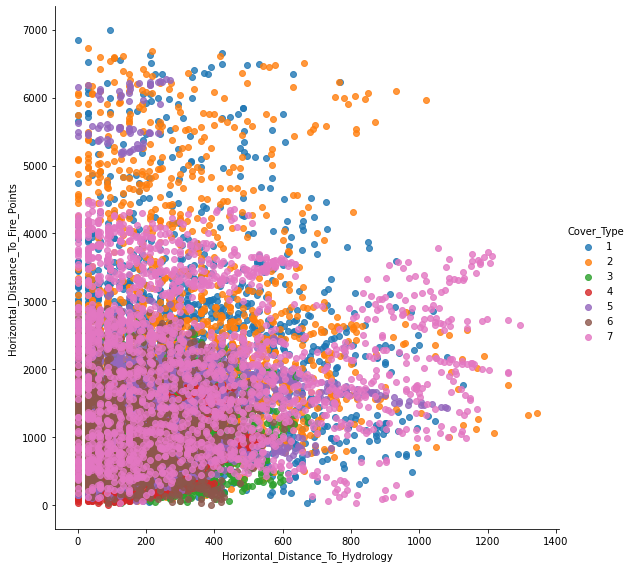

In [59]:
sns.lmplot(x= 'Horizontal_Distance_To_Hydrology', y= 'Horizontal_Distance_To_Fire_Points' , hue = 'Cover_Type', 
           data= train, fit_reg = False, height = 8);

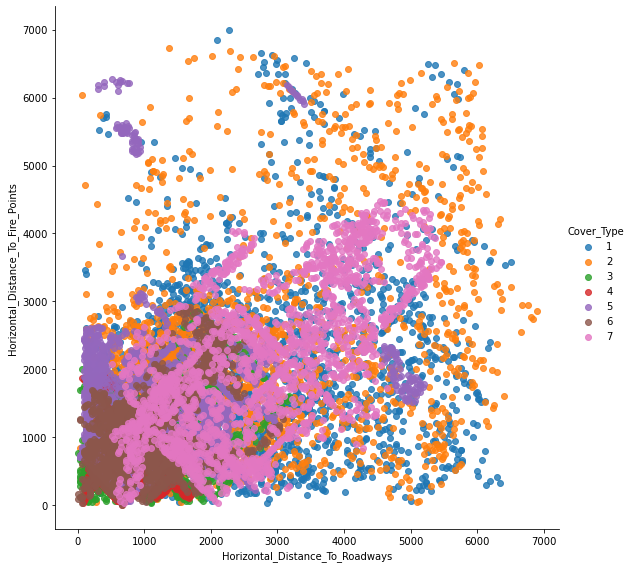

In [60]:
sns.lmplot(x= 'Horizontal_Distance_To_Roadways', y= 'Horizontal_Distance_To_Fire_Points' , hue = 'Cover_Type',
           data= train, fit_reg = False, height = 8);

### Lets check for discrete columns

In [61]:
# convert dummies into a single column
# convert wilderness
wild_dummies = train[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']]
wild = wild_dummies.idxmax(axis=1)
wild.name = 'wilderness'

In [62]:
# convert soil
soil_dummies = train[train.columns[15:55]]
soil = soil_dummies.idxmax(axis=1)
soil.name = 'soil_type'

In [63]:
df_train = pd.concat((train['Cover_Type'], wild, soil), axis =1)
#df_train

In [64]:
# test data
wild_dummies1 = test[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']]
wild1 = wild_dummies1.idxmax(axis=1)
wild1.name = 'wilderness'
#wild1

In [65]:
test.columns[15:55]

Index(['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'],
      dtype='object')

In [66]:
soil_dummies1 = test[test.columns[15:55]]
soil1 = soil_dummies1.idxmax(axis=1)
soil1.name = 'soil_type'
#soil1

In [67]:
df_test = pd.concat((test['Id'],wild1, soil1), axis =1)

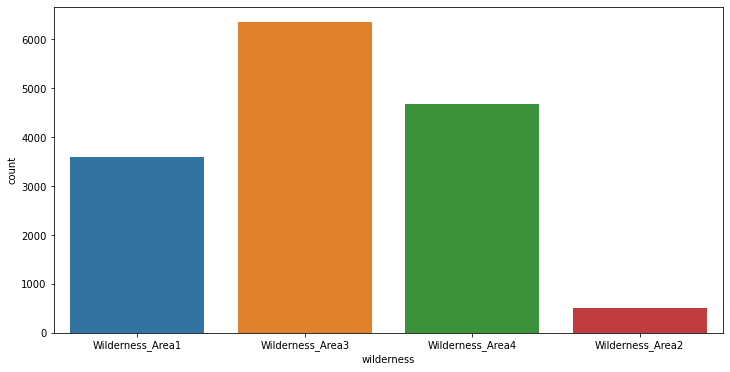

In [68]:
plt.figure(figsize = (12,6))
sns.countplot(x='wilderness',data=df_train);
plt.show()

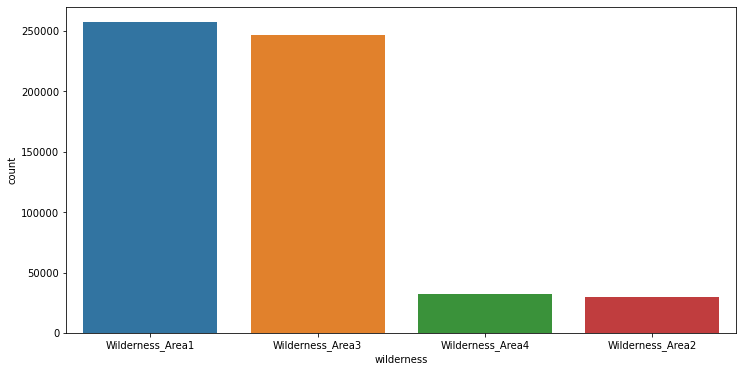

In [69]:
plt.figure(figsize = (12,6))
sns.countplot(x='wilderness',data=df_test);
plt.show()

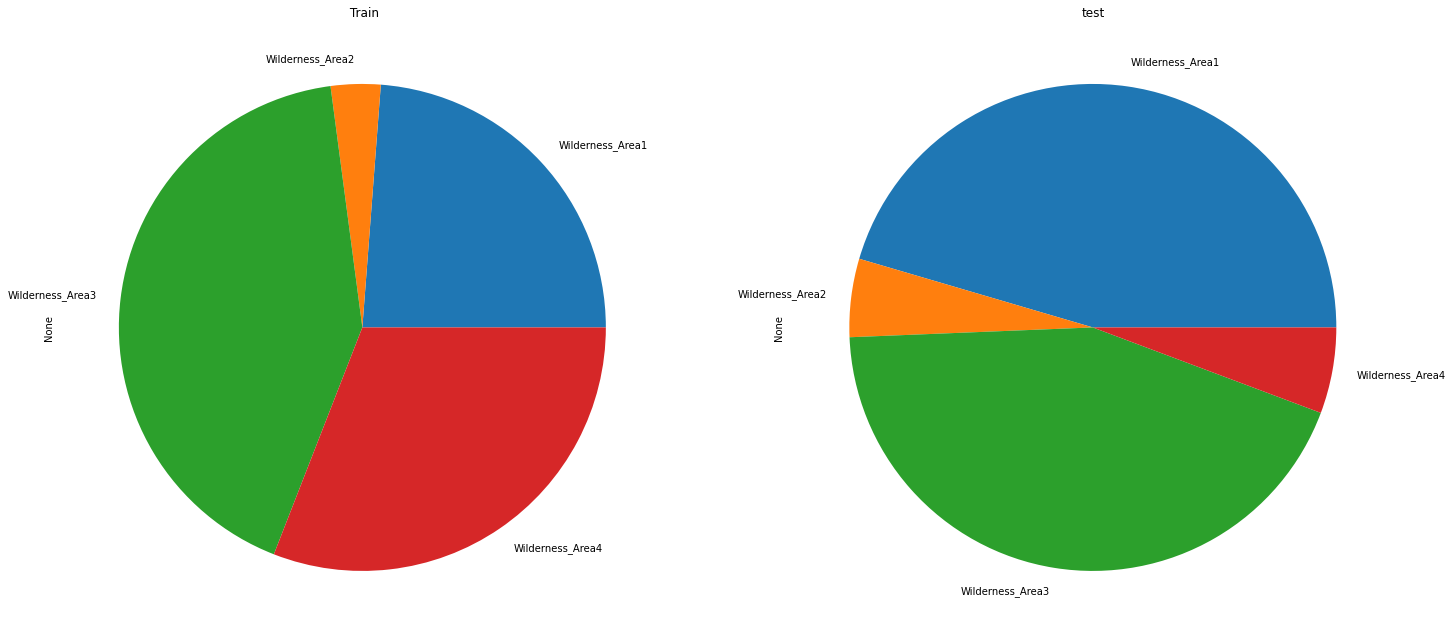

In [70]:
# this is the ratio of Wilderness_Area
plt.figure(figsize=(24, 12))
plt.subplot(121)
train.filter(regex="Wilderness").sum(axis=0).plot(kind='pie')
plt.title(' Train')

plt.subplot(122)
test.filter(regex="Wilderness").sum(axis=0).plot(kind='pie')
plt.title('test')
plt.show()

#### Can be seen that distribution of wildernessAreas is different in train and test data

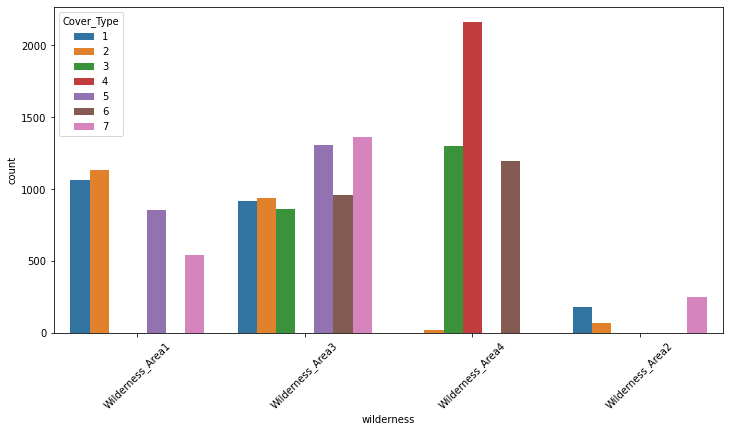

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(x='wilderness',data=df_train, hue='Cover_Type');
plt.xticks(rotation=45);

#### Wilderness area is an important feature to determine the cover type:

Spruce/Fir, Lodgepole Pine and Krummholz (Cover_Type 1, 2, 7) mostly found in Rawah, Neota and Comanche Peak Wilderness Area(1,2 and 3)

It is highly likely to find Ponderosa Pine (Cover_Type 3) in Cache la Poudre Wilderness Area (4) rather than other areas.

Cottonwood/Willow (Cover_Type 4) seems to be found only in Cache la Poudre Wilderness Area (4).

Aspen (Cover_Type 5) is equally likely to come from wilderness area Rawah and Comanche (1,3).

Douglas-fir (Cover_Type 6) can be found in wilderness areas 3 & 4 only.

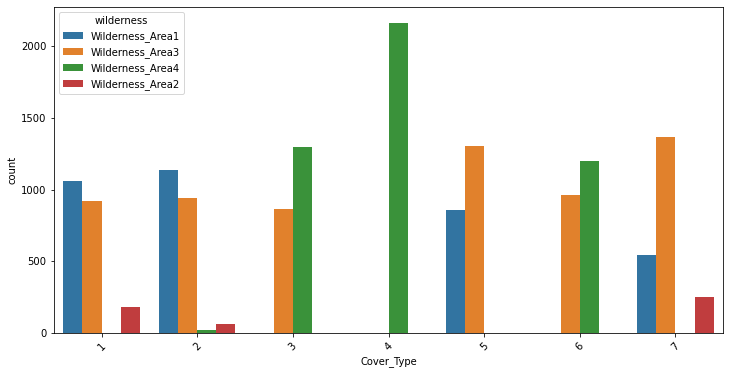

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(x='Cover_Type',data=df_train, hue='wilderness');
plt.xticks(rotation=45);

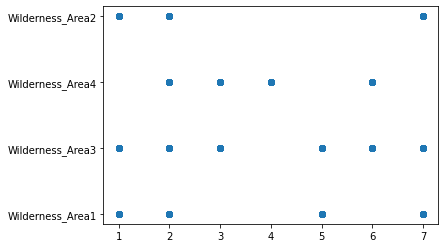

In [73]:
plt.scatter(x="Cover_Type", y = "wilderness", data = df_train)

#### There appears to be some pattern here, with certain forest cover preferring certain wilderness.

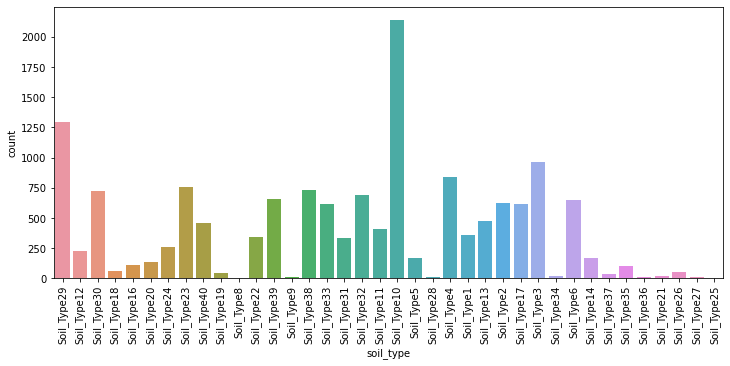

In [74]:
# Distribution of Soil_Type in train data

plt.figure(figsize=(12,5))
sns.countplot(x='soil_type',data=df_train);
plt.xticks(rotation=90);

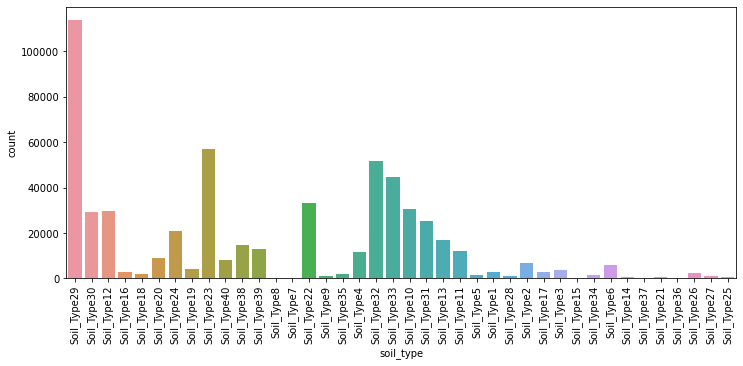

In [75]:
# Distribution of Soil_Type in test data
plt.figure(figsize=(12,5))
sns.countplot(x='soil_type',data=df_test);
plt.xticks(rotation=90);

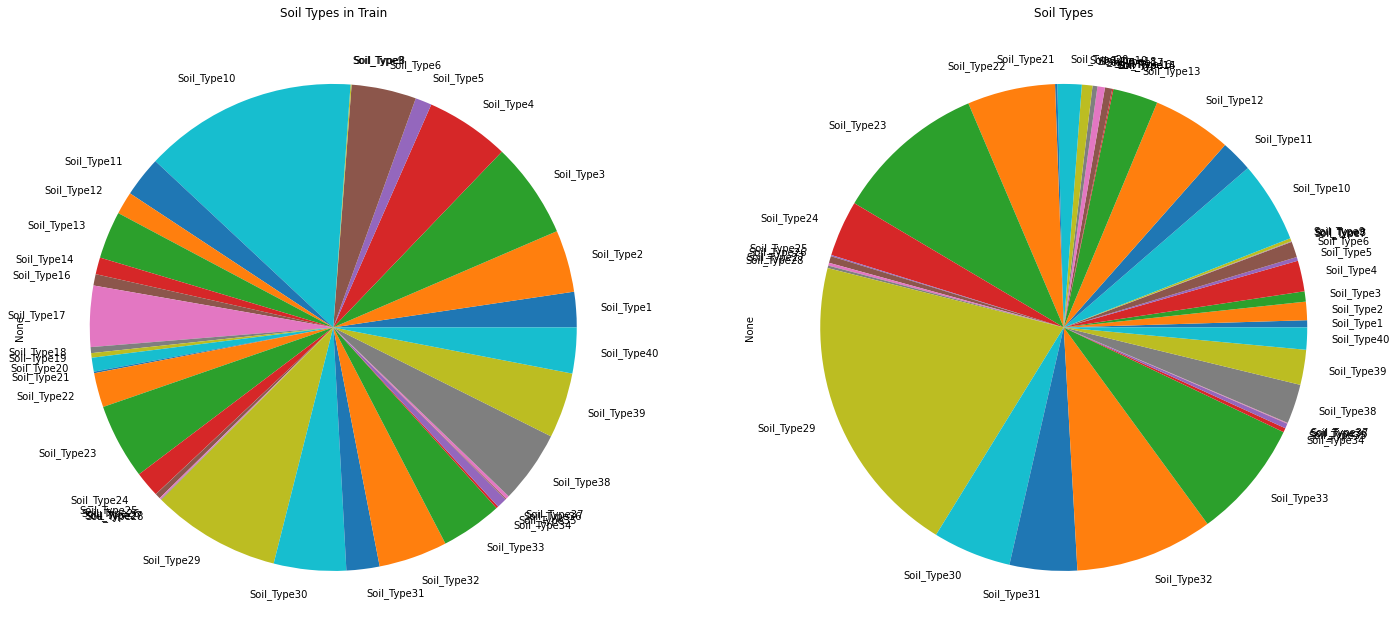

In [76]:
# this is the ratio of soil type
plt.figure(figsize=(24, 12))
plt.subplot(121)
train.filter(regex="Soil").sum(axis=0).plot(kind='pie')
plt.title('Soil Types in Train')

plt.subplot(122)
test.filter(regex="Soil").sum(axis=0).plot(kind='pie')
plt.title('Soil Types')
plt.show()

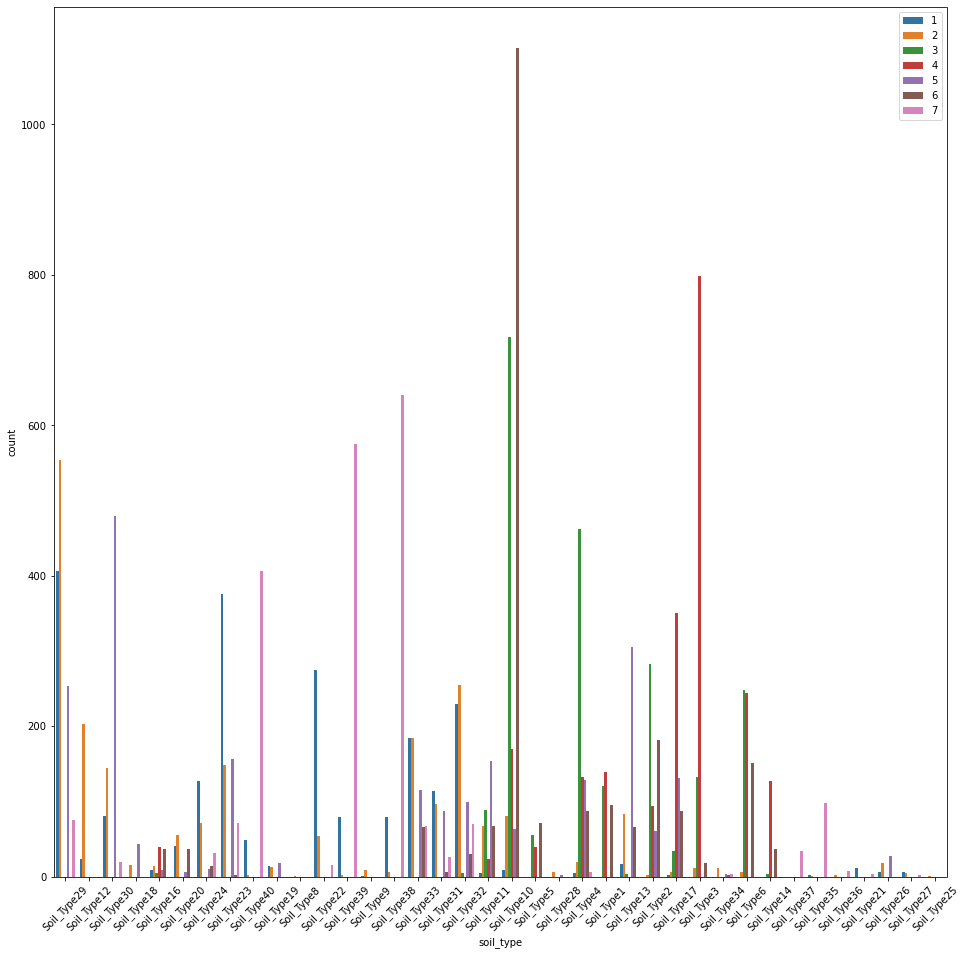

In [77]:
plt.figure(figsize=(16,16))
sns.countplot(x='soil_type',data=df_train, hue='Cover_Type');
plt.xticks(rotation=45)
plt.legend(loc = 'upper right');

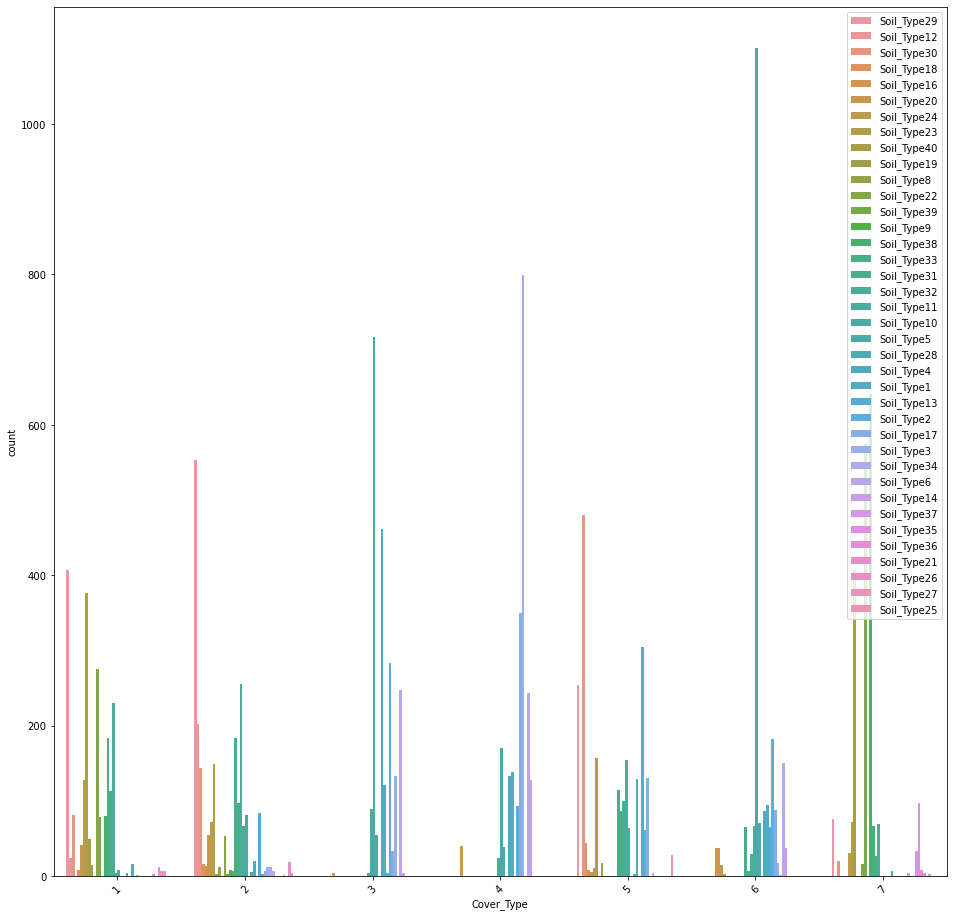

In [78]:
plt.figure(figsize=(16,16))
sns.countplot(x='Cover_Type',data=df_train, hue='soil_type');
plt.xticks(rotation=45)
plt.legend(loc = 'upper right');

#### Boxplots, comparsion with forest cover types

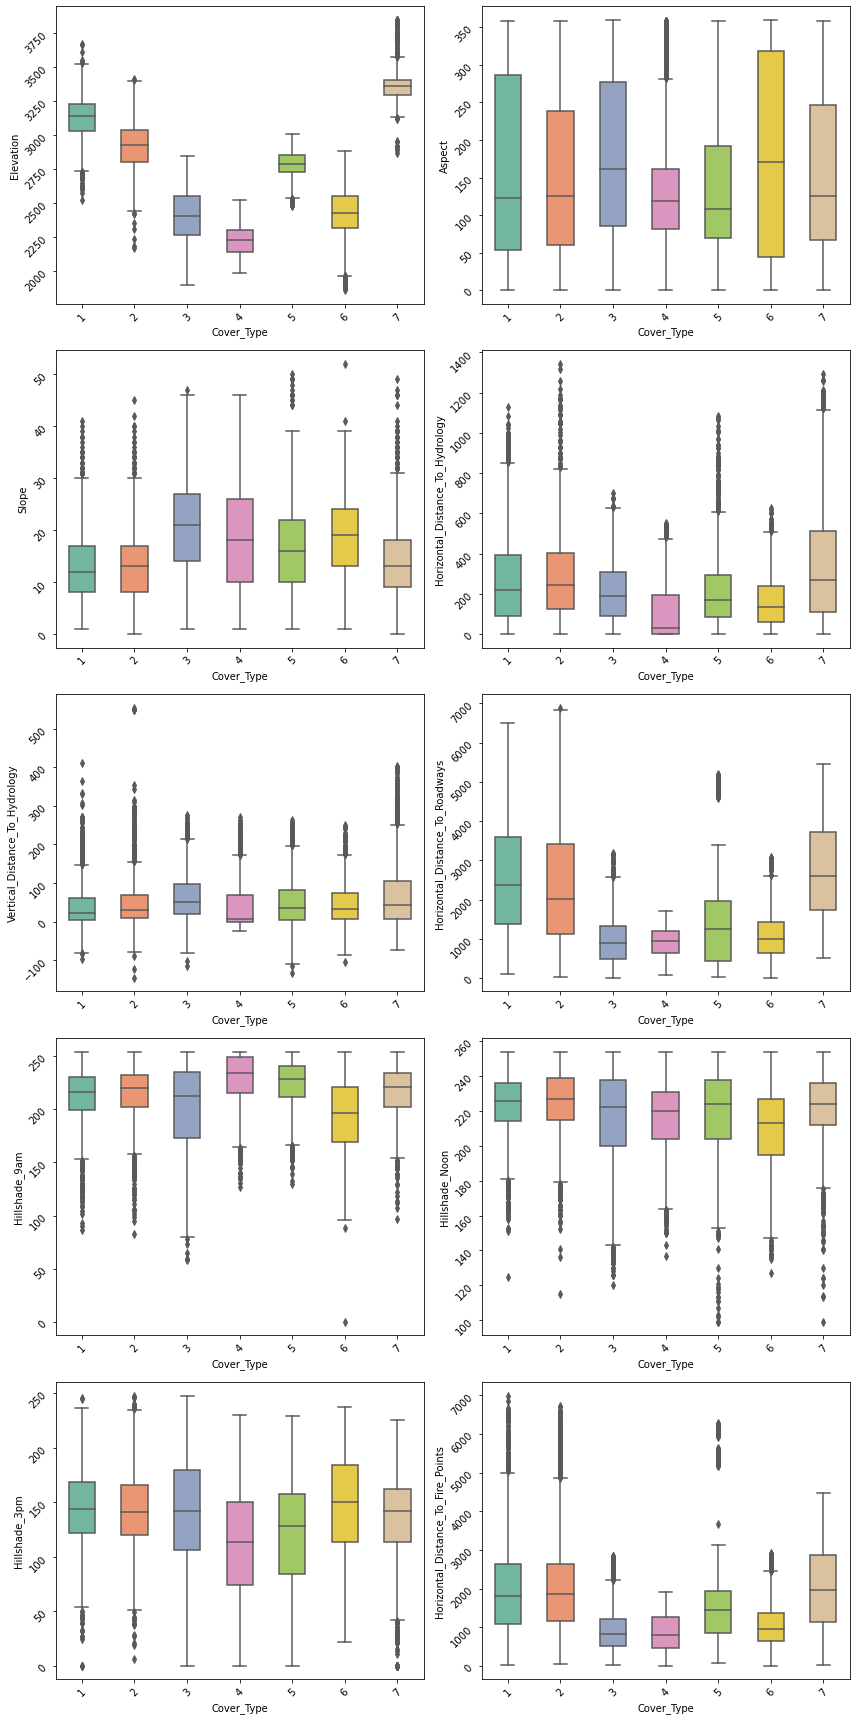

In [79]:
# select features which are continuous
cont_features = train[['Elevation', 'Aspect', 'Slope',
               'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
               'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
               'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Cover_Type']]

cmap = sns.color_palette("Set2")

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(12, 24))
a = [i for i in axes for i in i]
for i, ax in enumerate(a):
    sns.boxplot(x='Cover_Type', y=cont_features.columns[i], data=cont_features, palette=cmap, width=0.5, ax=ax);

# rotate x-axis for every single plot
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
    
# rotate y-axis for every single plot
for ax in fig.axes:
    plt.sca(ax)
    plt.yticks(rotation=45)

# set spacing for every subplot, else x-axis will be covered
plt.tight_layout()

#### We can see that elevation has very different interquantile ranges for each cover type.

#### Correlation

In [80]:
corr = train.corr()

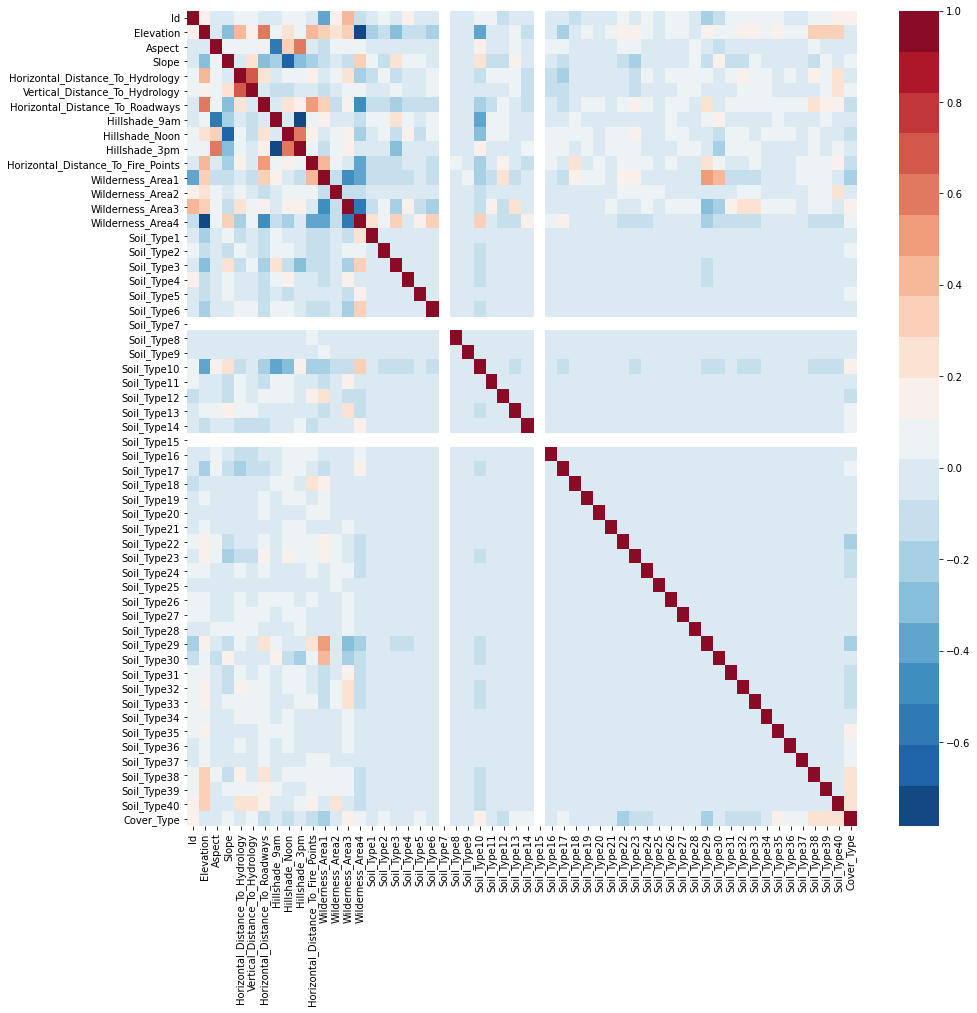

In [81]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 20));

#### Soil Type 7 & Soil Type 15 has no correlation to cover type. They can be dropped off in feature selection

### 3.22.3 Creating ( Feature Engineering - Making new features)¶

#### we can combine Vertical distance to Hydrology and Horizontal distance to Hydrology, and applying Pythogorean theorem yield us Distance to Hydrology. This feature carries much more information rather than simple horizontal and vertical notions, because obviously cover type of land should depend on direct distance to water source.

In [82]:
train = trees

In [83]:
data = (train, test)
for dataset in data:
    dataset['Slope2'] = (dataset['Horizontal_Distance_To_Hydrology']**2+dataset['Vertical_Distance_To_Hydrology']**2)**0.5

#### Distance to Hydrology and Fire Points are likely to play a role in determination of the tree types. Lets take sum and difference   of them as new columns

In [84]:
for dataset in data:
    dataset['Hydro_FireSum'] = dataset['Horizontal_Distance_To_Hydrology'] + dataset['Horizontal_Distance_To_Fire_Points']
    dataset['Hydro_FireDiff'] = dataset['Horizontal_Distance_To_Hydrology'] - dataset['Horizontal_Distance_To_Fire_Points']

#### Distance to Hydrology and Roadways are likely to play a role in determination of the tree types. Lets take sum, difference  of them as new columns

In [85]:
for dataset in data:
    dataset['Hydro_RoadSum'] = dataset['Horizontal_Distance_To_Hydrology'] + dataset['Horizontal_Distance_To_Roadways']
    dataset['Hydro_RoadDiff'] = dataset['Horizontal_Distance_To_Hydrology'] - dataset['Horizontal_Distance_To_Roadways']

#### Distance to Fire points and Roadways are likely to play a role in determination of the tree types. Lets take sum, difference  of them as new columns

In [86]:
for dataset in data:
    dataset['Fire_RoadSum'] = dataset['Horizontal_Distance_To_Fire_Points'] + dataset['Horizontal_Distance_To_Roadways']
    dataset['Fire_RoadDiff'] =dataset['Horizontal_Distance_To_Fire_Points'] - dataset['Horizontal_Distance_To_Roadways']

#### Elevation, and vertical distance to hydrology are likely to play a role in determination of the tree types. Lets take sum, difference  of them as new columns

In [87]:
for dataset in data:
    
    dataset['Hydro_Elevation_Vert_Sum'] = dataset['Elevation'] + dataset['Vertical_Distance_To_Hydrology'] 
    dataset['Hydro_Elevation_Vert_Diff'] = dataset['Elevation'] - dataset['Vertical_Distance_To_Hydrology']

In [88]:
print(train.shape, test.shape)

(14988, 65) (565892, 64)


### 3.22.4 Converting

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14988 entries, 11 to 15119
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  14988 non-null  int64  
 1   Elevation                           14988 non-null  int64  
 2   Aspect                              14988 non-null  int64  
 3   Slope                               14988 non-null  int64  
 4   Horizontal_Distance_To_Hydrology    14988 non-null  int64  
 5   Vertical_Distance_To_Hydrology      14988 non-null  int64  
 6   Horizontal_Distance_To_Roadways     14988 non-null  int64  
 7   Hillshade_9am                       14988 non-null  int64  
 8   Hillshade_Noon                      14988 non-null  int64  
 9   Hillshade_3pm                       14988 non-null  int64  
 10  Horizontal_Distance_To_Fire_Points  14988 non-null  int64  
 11  Wilderness_Area1                    1498

#### After correcting, completing, creating and converting, lets do feature selection now

### 3.22.5 Feature Selection

In [90]:
# Make copy of train and test for feature selection, keeping train_orig and test_orig

train_before_FS = train.copy(deep  = True)
test_before_FS = test.copy(deep  = True)

In [91]:
# Feature selection by Correlation

corr2 = train.corr()
corr2['Cover_Type'].sort_values(ascending=False)

Cover_Type                            1.000000
Soil_Type38                           0.257554
Soil_Type39                           0.240114
Soil_Type40                           0.205649
Soil_Type10                           0.126641
Wilderness_Area3                      0.116628
Soil_Type35                           0.114325
Id                                    0.100251
Hydro_RoadDiff                        0.094760
Slope                                 0.081715
Vertical_Distance_To_Hydrology        0.074566
Soil_Type37                           0.071238
Wilderness_Area4                      0.071171
Hydro_FireDiff                        0.061284
Fire_RoadDiff                         0.050266
Soil_Type17                           0.041110
Soil_Type13                           0.039366
Hydro_Elevation_Vert_Sum              0.029451
Soil_Type5                            0.027036
Soil_Type36                           0.025669
Soil_Type14                           0.021321
Soil_Type2   

#### Soil_Type7 and Soil_Type15 do not have any correlation, therefore they can be dropped

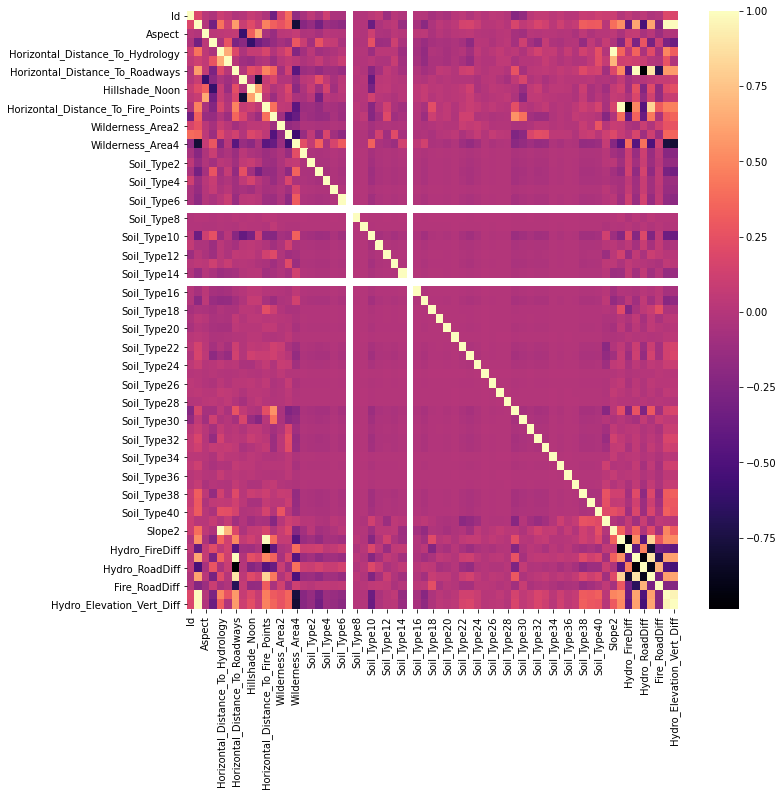

In [92]:
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr2, cmap='magma');

In [93]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(0, len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [94]:
corr_features1 = correlation(train, 0.9)
corr_features1

{'Hydro_Elevation_Vert_Diff',
 'Hydro_Elevation_Vert_Sum',
 'Hydro_FireDiff',
 'Hydro_FireSum',
 'Hydro_RoadDiff',
 'Hydro_RoadSum',
 'Slope2'}

##### As all are newly made features, I am not dropping them

In [95]:
# As Soil_Type7 and Soil_Type15 do not have any correlation with Cover_Type, Lets drop them alongwith Id

data1 = (train, test)
for dataset in data1:
    dataset.drop(columns=['Id', 'Soil_Type7', 'Soil_Type15'], axis=1, inplace = True)
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type', 'Slope2', 'H

In [96]:
# making X (Independent variables) and y(dependent variable) 
X =train.drop('Cover_Type' , axis =1) 
y =train['Cover_Type']

In [97]:
# splitting in train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.05, random_state=42 )

In [98]:
unique, count= np.unique(y_train, return_counts=True)
print("The number of occurances of each class in the dataset = %s  "% dict (zip(unique, count) ))

The number of occurances of each class in the dataset = {1: 2017, 2: 1984, 3: 2041, 4: 2044, 5: 2038, 6: 2061, 7: 2053}  


#### Feature Selection using feature_importances
Lets now see if the new features we added have any segnificance for the extra tree model or not and how important are our features. We can check that through the Extra trees algorithm which can predict the useful features internally usign "feature_importances"

In [99]:
clf = ExtraTreesClassifier()
clf.fit(X_train,y_train)
# display the relative importance of each attribute
z = clf.feature_importances_
#make a dataframe to display every value and its column name
df = pd.DataFrame()
print(len(z))
print(len(list(X_train.columns.values)))

df["values"] = z
df['column'] = list(X_train.columns.values)
# Sort then descendingly to get the worst features at the end
df.sort_values(by='values', ascending=False, inplace = True)
df.head(100)

61
61


values                              column
60  0.096991           Hydro_Elevation_Vert_Diff
0   0.090043                           Elevation
59  0.072189            Hydro_Elevation_Vert_Sum
13  0.044797                    Wilderness_Area4
5   0.036482     Horizontal_Distance_To_Roadways
57  0.036455                        Fire_RoadSum
56  0.033820                      Hydro_RoadDiff
55  0.031921                       Hydro_RoadSum
58  0.030899                       Fire_RoadDiff
52  0.030558                              Slope2
9   0.029490  Horizontal_Distance_To_Fire_Points
53  0.029032                       Hydro_FireSum
3   0.028649    Horizontal_Distance_To_Hydrology
54  0.027892                      Hydro_FireDiff
1   0.026625                              Aspect
6   0.025631                       Hillshade_9am
22  0.024906                         Soil_Type10
4   0.024035      Vertical_Distance_To_Hydrology
7   0.023961                      Hillshade_Noon
8   0.023151                       Hillshade_3pm
16  0.022485                          Soil_Type3
2   0.020240                               Slope
49  0.019351                         Soil_Type38
10  0.018081                    Wilderness_Area1
50  0.016861                         Soil_Type39
12  0.016656                    Wilderness_Area3
17  0.014371                          Soil_Type4
51  0.010190                         Soil_Type40
41  0.010115                         Soil_Type30
28  0.007437                         Soil_Type17
15  0.007264                          Soil_Type2
34  0.006545                         Soil_Type23
33  0.006364                         Soil_Type22
40  0.006001                         Soil_Type29
25  0.005951                         Soil_Type13
43  0.005836                         Soil_Type32
44  0.004408                         Soil_Type33
24  0.004312                         Soil_Type12
19  0.003806                          Soil_Type6
23  0.003671                         Soil_Type11
42  0.003331                         Soil_Type31
35  0.002988                         Soil_Type24
11  0.002721                    Wilderness_Area2
46  0.002135                         Soil_Type35
14  0.001896                          Soil_Type1
31  0.001665                         Soil_Type20
18  0.001509                          Soil_Type5
26  0.001362                         Soil_Type14
27  0.001176                         Soil_Type16
29  0.000659                         Soil_Type18
37  0.000626                         Soil_Type26
48  0.000615                         Soil_Type37
30  0.000567                         Soil_Type19
45  0.000366                         Soil_Type34
32  0.000266                         Soil_Type21
39  0.000176                         Soil_Type28
38  0.000174                         Soil_Type27
47  0.000145                         Soil_Type36
21  0.000133                          Soil_Type9
36  0.000017                         Soil_Type25
20  0.000001                          Soil_Type8

In [100]:
#### We can drop Soil_Type25 and Soil_Type8, and check accuracy
X_train1  = X_train.copy(deep=True)
X_test1  = X_test.copy(deep=True)

X_train1.drop(['Soil_Type25', 'Soil_Type8'], axis =1, inplace = True)
X_test1.drop(['Soil_Type25', 'Soil_Type8'], axis =1, inplace =True)

In [101]:
# Lets check accuracy on X_train and X_train1 after standard scaling

In [102]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [104]:
clf = ExtraTreesClassifier(n_estimators=950, random_state=0)

clf.fit(X_train, y_train)
print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(X_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X_test, y_test) * 100))

Accuracy of classifier on training set: 100.00
Accuracy of classifier on test set: 92.67


In [105]:
clf = ExtraTreesClassifier(n_estimators=950, random_state=0)

clf.fit(X_train1, y_train)
print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(X_train1, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X_test1, y_test) * 100))

Accuracy of classifier on training set: 100.00
Accuracy of classifier on test set: 93.07


#### I have got better result without columns 'Soil_Type25', 'Soil_Type8', Lets check their numbers in train and test data


In [109]:
df_train['soil_type'].value_counts()

Soil_Type10    2142
Soil_Type29    1291
Soil_Type3      962
Soil_Type4      843
Soil_Type23     757
Soil_Type38     728
Soil_Type30     725
Soil_Type32     690
Soil_Type39     657
Soil_Type6      650
Soil_Type2      623
Soil_Type33     616
Soil_Type17     612
Soil_Type13     476
Soil_Type40     459
Soil_Type11     406
Soil_Type1      355
Soil_Type22     345
Soil_Type31     332
Soil_Type24     257
Soil_Type12     227
Soil_Type14     169
Soil_Type5      165
Soil_Type20     139
Soil_Type16     114
Soil_Type35     102
Soil_Type18      60
Soil_Type26      54
Soil_Type19      46
Soil_Type37      34
Soil_Type34      22
Soil_Type21      16
Soil_Type27      15
Soil_Type9       10
Soil_Type36      10
Soil_Type28       9
Soil_Type25       1
Soil_Type8        1
Name: soil_type, dtype: int64

In [110]:
df_test['soil_type'].value_counts()

Soil_Type29    113956
Soil_Type23     56995
Soil_Type32     51829
Soil_Type33     44538
Soil_Type22     33028
Soil_Type10     30492
Soil_Type12     29744
Soil_Type30     29445
Soil_Type31     25334
Soil_Type24     21021
Soil_Type13     16955
Soil_Type38     14845
Soil_Type39     13149
Soil_Type11     12004
Soil_Type4      11553
Soil_Type20      9120
Soil_Type40      8291
Soil_Type2       6902
Soil_Type6       5925
Soil_Type19      3975
Soil_Type3       3861
Soil_Type17      2810
Soil_Type16      2731
Soil_Type1       2676
Soil_Type26      2535
Soil_Type18      1839
Soil_Type35      1789
Soil_Type34      1589
Soil_Type5       1432
Soil_Type9       1137
Soil_Type27      1071
Soil_Type28       937
Soil_Type21       822
Soil_Type25       473
Soil_Type14       430
Soil_Type37       264
Soil_Type8        178
Soil_Type36       109
Soil_Type7        105
Soil_Type15         3
Name: soil_type, dtype: int64

#### As there are 473 Soil_Type25, 178 Soil_Type8, 3 Soil_Type15 and 105 Soil_Type7 in test data, it is prudent to keep all of them

In [42]:
len(train_before_FS.columns), len(test_before_FS.columns)

(65, 64)

In [111]:
#### Dropping features as suggested by Feature Selection
train = train_before_FS.drop(columns=['Id'], axis=1)
test = test_before_FS.drop(columns=['Id'], axis=1)

In [114]:
train.shape, test.shape

((14988, 64), (565892, 63))

### Step 4: Perform Exploratory Analysis with Statistics

In [115]:
corr3 = train.corr()
corr3['Cover_Type'].sort_values(ascending=False)

Cover_Type                            1.000000
Soil_Type38                           0.257554
Soil_Type39                           0.240114
Soil_Type40                           0.205649
Soil_Type10                           0.126641
Wilderness_Area3                      0.116628
Soil_Type35                           0.114325
Hydro_RoadDiff                        0.094760
Slope                                 0.081715
Vertical_Distance_To_Hydrology        0.074566
Soil_Type37                           0.071238
Wilderness_Area4                      0.071171
Hydro_FireDiff                        0.061284
Fire_RoadDiff                         0.050266
Soil_Type17                           0.041110
Soil_Type13                           0.039366
Hydro_Elevation_Vert_Sum              0.029451
Soil_Type5                            0.027036
Soil_Type36                           0.025669
Soil_Type14                           0.021321
Soil_Type2                            0.021156
Elevation    

In [116]:
# making X (Independent variables) and y(dependent variable) 
X =train.drop('Cover_Type' , axis =1) 
y =train['Cover_Type']

In [117]:
# splitting in train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42 )

#### Standard Scaling

In [118]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
print(X_train.shape, y_train.shape)

(13489, 63) (13489,)


In [120]:
print(X_test.shape, X_test.shape)

(1499, 63) (1499, 63)


### Step 5: Model Data

In [121]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),

    #Trees    
    tree.DecisionTreeClassifier()
    ]

In [122]:
#Lets check accuracy and time of all above classification models on both train and test data

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'Train Accuracy Mean', 'Train Accuracy *STD' ,'Test Accuracy','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_train, y_train, cv  = 10)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    #MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'Train Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'Train Accuracy *STD'] = cv_results['test_score'].std()   #let's know the worst that can happen!
    

    #save MLA predictions 
    alg.fit(X_train, y_train)
    MLA_compare.loc[row_index, 'Test Accuracy'] = accuracy_score(y_test, alg.predict(X_test))
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['Train Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

MLA Name  \
2    ExtraTreesClassifier   
3  RandomForestClassifier   
1       BaggingClassifier   
4    KNeighborsClassifier   
5  DecisionTreeClassifier   
0      AdaBoostClassifier   

                                                                                                                                                                                                                                                                                                                                                                                                                          MLA Parameters  \
2  {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}   
3   {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}   
1                                                                                                                                                                                                     {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}   
4                                                                                                                                                                                                                                                                                   {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}   
5                                                                                            {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}   
0                                                                                                                                                                                                                                                                                                                       {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}   

  Train Accuracy Mean Train Accuracy *STD Test Accuracy  MLA Time  
2            0.897621          0.00552331      0.925284   2.18546  
3            0.887538          0.00622646      0.907939   3.21538  
1            0.849952          0.00705917      0.875917   2.12768  
4            0.809475          0.00940639      0.839226  0.259705  
5            0.800579          0.00782536      0.841895  0.305898  
0            0.442805            0.013279      0.410274   1.84743

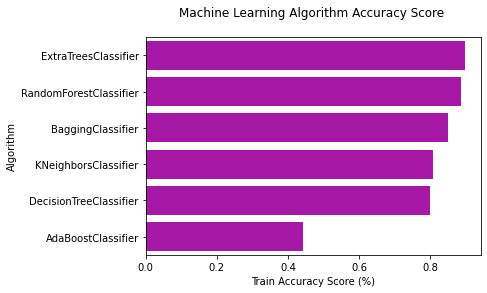

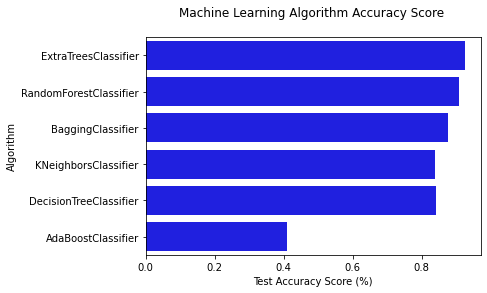

In [124]:
# Visualisation of the same with barplot
figsize = (24,24)

sns.barplot(x='Train Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm');
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Train Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.show()

sns.barplot(x='Test Accuracy', y = 'MLA Name', data = MLA_compare, color = 'b');
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Test Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.show()

In [125]:
#Lets use the below function to find accuracy, Precision and recall score

def print_score(clf, X_train, y_train):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''

    
    clf.fit(X_train, y_train)
    clf.predict(X_train)
    
    print("Train Result:\n")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
    print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

    res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    mean_res = np.mean(res)
    print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

In [126]:
MLAs = [ExtraTreesClassifier(),RandomForestClassifier()]
for clf in MLAs:
    print(clf)
    print('-'*20)
    print_score(clf, X_train, y_train)
    print('-'*20)

ExtraTreesClassifier()
--------------------
Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1911
           2       1.00      1.00      1.00      1886
           3       1.00      1.00      1.00      1941
           4       1.00      1.00      1.00      1942
           5       1.00      1.00      1.00      1932
           6       1.00      1.00      1.00      1956
           7       1.00      1.00      1.00      1921

    accuracy                           1.00     13489
   macro avg       1.00      1.00      1.00     13489
weighted avg       1.00      1.00      1.00     13489


Confusion Matrix: 
 [[1911    0    0    0    0    0    0]
 [   0 1886    0    0    0    0    0]
 [   0    0 1941    0    0    0    0]
 [   0    0    0 1942    0    0    0]
 [   0    0    0    0 1932    0    0]
 [   0    0    0    0    0 1956    0]
 [   0    0    0    0    0    0 1921]]

Averag

### 5.12 Tune Model with Hyper-Parameters

#### ExtraTreesClassifier has given the best results, lets tune its hyperparameters and check the results again

In [50]:
# Lets use GridSearchCV with pipeline on entire train set (X, y)

In [128]:
%%time

xrf_pipe = Pipeline(
    steps = [
        ('classifier', ExtraTreesClassifier(n_estimators=500,random_state=0, criterion = 'entropy'))
    ]
)


xrf_param_grid = {
    'classifier__min_samples_leaf': [1,4,7],
    'classifier__max_depth': [34,38,32],
}

np.random.seed(1)
xrf_grid_search = GridSearchCV(xrf_pipe, xrf_param_grid, cv=5, refit='True', n_jobs=-1)
xrf_grid_search.fit(X, y)

print(xrf_grid_search.best_score_)
print(xrf_grid_search.best_params_)

0.8247308015153246
{'classifier__max_depth': 34, 'classifier__min_samples_leaf': 1}
CPU times: user 11.1 s, sys: 576 ms, total: 11.7 s
Wall time: 2min 41s


In [129]:
xrf_model = xrf_grid_search.best_estimator_

cv_score = cross_val_score(xrf_model, X, y, cv = 5)
print(cv_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

[0.82821881 0.79152769 0.7891928  0.82749416 0.88722055]
Accuracy: 0.82 (+/- 0.07)


In [133]:
xrf_grid_search.best_estimator_.steps[0][1]

ExtraTreesClassifier(criterion='entropy', max_depth=34, n_estimators=500,
                     random_state=0)

In [134]:
final_model = xrf_grid_search.best_estimator_.steps[0][1]
final_model.fit(X, y)

ExtraTreesClassifier(criterion='entropy', max_depth=34, n_estimators=500,
                     random_state=0)

In [135]:
#Lets check accuracy on test data of kaggle by submitting predictions in form of submission file

y_pred_test = final_model.predict(test)

temp = pd.DataFrame(pd.read_csv("/Users/tuktuk/Downloads/forest-cover-type-kernels-only/test.csv.zip")['Id'])
temp['Cover_Type'] = y_pred_test
temp.to_csv("/Users/tuktuk/Downloads/forest-cover-type-kernels-only/submission14Sep4.csv", index = False)

In [136]:
from collections import Counter
Counter(y_pred_test)

Counter({2: 243567,
         5: 24820,
         1: 208470,
         7: 27459,
         3: 36906,
         6: 22689,
         4: 1981})

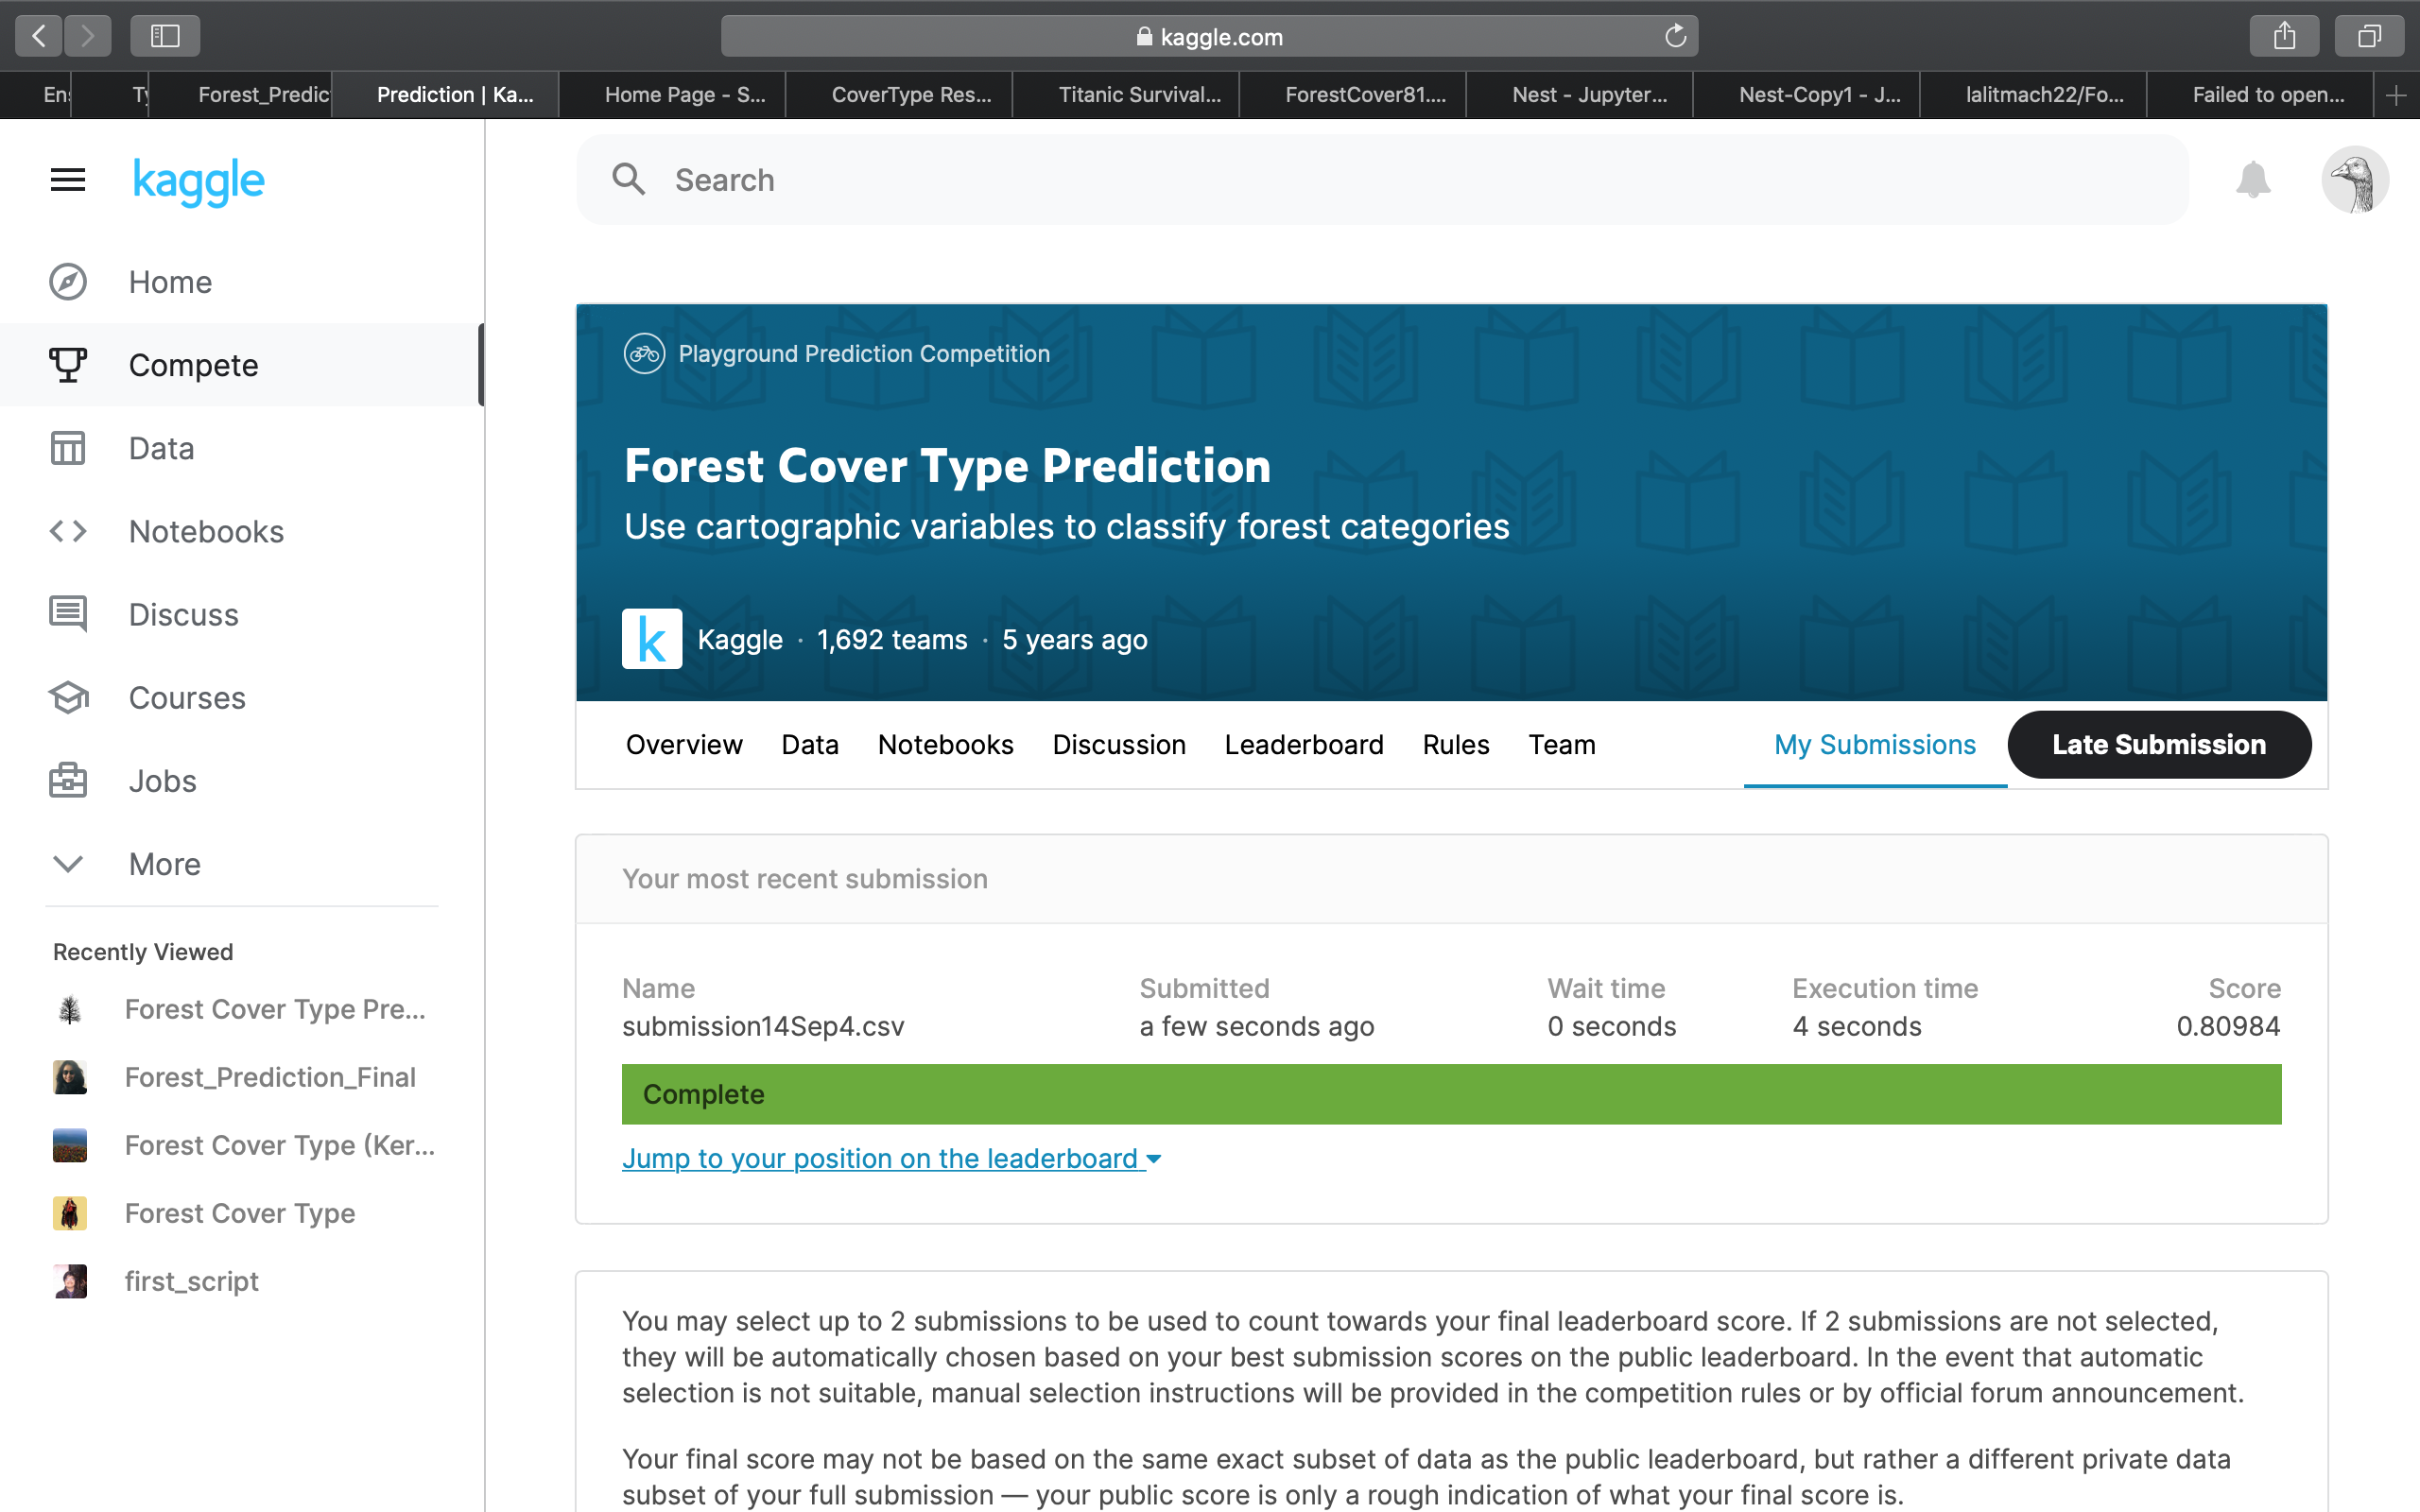

In [137]:
Image("/Users/tuktuk/Desktop/Screenshot 2020-09-15 at 3.58.52 PM.png")

#### Submitted and got accuracy score of .80984 on Kaggle

# Happy Learning............
## Notebook is available at
### https://github.com/lalitmach22/ForestCoverType